In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 학습 모델 저장을 위한 라이브러리
import pickle

# 폴더에 들어있는 파일 가져오기
import glob
import os

## 📤 데이터를 불러온다.

In [3]:
# 모든 parquet 파일 불러오기
file_list = glob.glob("C:/Users/user/Desktop/workspace/14_Final_PROJECT/open/train/1.회원정보/*.parquet")

df_all = pd.DataFrame()

for file in file_list:
    temp = pd.read_parquet(file)
    df_all = pd.concat([df_all, temp], ignore_index=True)


def resumetable(df):
  print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
  summary = summary.reset_index()                                   # 인덱스를 초기화하여 컬럼으로 변환
  summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

  summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
  summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산

  numeric_cols = df.select_dtypes(include=['number']).columns
  summary['최소 값'] = df[numeric_cols].min().reindex(summary['피처']).values
  summary['최대 값'] = df[numeric_cols].max().reindex(summary['피처']).values  

  summary['첫 번째 값'] = df.loc[0].values                          # 각 피처의 첫 번째 샘플 값
  summary['두 번째 값'] = df.loc[1].values                          # 각 피처의 두 번째 샘플 값
  summary['세 번째 값'] = df.loc[2].values                          # 각 피처의 세 번째 샘플 값

  # middle_index = len(df) // 2                             
  # summary['중간 값'] = df.loc[middle_index].values                  # 각 피처의 중간 샘플 값
    
  last_index = len(df)-1                              
  summary['끝 값'] = df.loc[last_index].values                      # 각 피처의 끝 샘플 값


  # 명세서 읽어오기 
  desc_df = pd.read_excel("C:/Users/user/Desktop/workspace/14_Final_PROJECT/open/신용카드_고객_세그먼트_분류_AI_경진대회_데이터_명세.xlsx")
  # 명세서에서 no 컬럼 제거
  desc_df.drop(columns=['No'], inplace=True)
  # 명세서 합기기
  summary = pd.merge(summary, desc_df, how='left', left_on='피처', right_on='컬럼명')
  summary.drop(columns=['컬럼명'], inplace=True)
  cols = summary.columns.tolist()
  cols.insert(1, cols.pop(cols.index('설명')))
  summary = summary[cols]

  return summary                                                     # 요약 테이블 반환


# 생략 없이 열/행 모두 보기 설정
pd.set_option('display.max_columns', None)  # 열(Column) 전체 출력
pd.set_option('display.max_rows', None)     # 행(Row) 전체 출력


resumetable(df_all)

데이터셋 크기: (2400000, 78)


,피처,설명,데이터 타입,결측값 개수,고유값 개수,최소 값,최대 값,첫 번째 값,두 번째 값,세 번째 값,끝 값
0,기준년월,데이터 기준년월,int64,0,6,201807.0,201812.0,201807,201807,201807,201812
1,ID,고유 ID,object,0,400000,NaN,NaN,TRAIN_000000,TRAIN_000001,TRAIN_000002,TRAIN_399999
2,남녀구분코드,남녀 구분 코드,int64,0,2,1.0,2.0,2,1,1,2
3,연령,나이,object,0,6,NaN,NaN,40대,30대,30대,40대
4,Segment,NaN,object,0,5,NaN,NaN,D,E,C,E
5,회원여부_이용가능,분실/연체/한도 소진 등으로 Black List로 등재 되지 않은 회원,int64,0,2,0.0,1.0,1,1,1,1
6,회원여부_이용가능_CA,분실/연체/한도 소진 등으로 Black List로 등재 되지 않아 현금서비스 \n이...,int64,0,2,0.0,1.0,1,1,1,1
7,회원여부_이용가능_카드론,분실/연체/한도 소진 등으로 Black List로 등재 되지 않아 카드장기대출\n(...,int64,0,2,0.0,1.0,0,1,0,0
8,소지여부_신용,신용카드를 소지한 회원,int64,0,2,0.0,1.0,1,1,1,1
9,소지카드수_유효_신용,유효한 신용카드의 보유 수,int64,0,5,0.0,4.0,1,1,1,1


## ✅ 기본 분포 및 이상치 확인

### Segment 분포 확인 (타겟 값 비율)

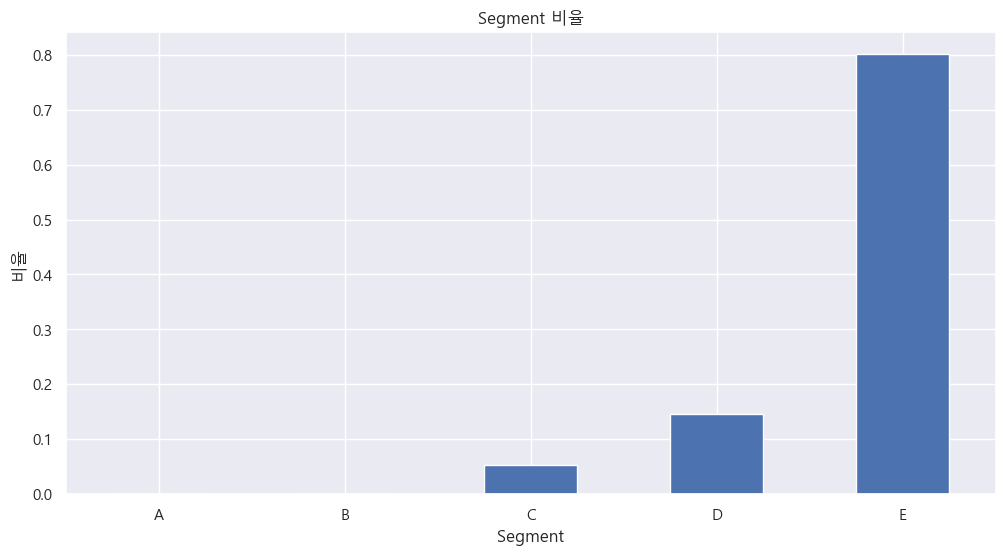

In [6]:
# 각 Segment가 데이터에서 차지하는 비율을 계산하여 막대그래프로 시각화
# 비율(normalized)로 막대그래프 그리기
df_all['Segment'].value_counts(normalize=True).reindex(['A', 'B', 'C', 'D', 'E']).plot(kind='bar')

# 그래프 제목
plt.title("Segment 비율")

# x축 이름
plt.xlabel("Segment")

# y축 이름
plt.ylabel("비율")

# x축 눈금 라벨 회전 설정
plt.xticks(rotation=0)

plt.show()

###  📊 Segment E에 데이터가 몰려 있는 불균형 데이터셋

- 평가 지표 변경 → accuracy 대신 f1-score 활용
- 왜 Segment E가 많을까? (Segment별 특성 비교 (예: 연령대, 이용금액, 연체여부 등)
- 특정 Segment에 차별화된 변수 존재하는가?

In [8]:
# 결측치 비율 확인
df_all.isnull().mean().sort_values(ascending=False).head(20)

_2순위신용체크구분        0.399215
최종유효년월_신용_이용      0.222596
가입통신회사코드          0.161488
직장시도명             0.102070
최종유효년월_신용_이용가능    0.087686
최종카드발급일자          0.017485
_1순위신용체크구분        0.011646
이용금액_R3M_체크_가족    0.000000
_1순위카드이용금액        0.000000
_1순위카드이용건수        0.000000
이용카드수_신용_가족       0.000000
_2순위카드이용금액        0.000000
_2순위카드이용건수        0.000000
이용금액_R3M_체크       0.000000
이용금액_R3M_신용_가족    0.000000
이용금액_R3M_신용       0.000000
이용금액_R3M_신용체크     0.000000
이용카드수_체크_가족       0.000000
보유여부_해외겸용_본인      0.000000
이용가능여부_해외겸용_본인    0.000000
dtype: float64

###  📊 기본적으로 제거
- 2순위신용체크구분        0.399215
- 최종유효년월_신용_이용      0.222596
- 가입통신회사코드          0.161488
- 직장시도명             0.102070
- 최종유효년월_신용_이용가능    0.087686
- 최종카드발급일자          0.017485
- 1순위신용체크구분 0.011646

In [10]:
# 결측치가 있는 행을 제거
df_all = df_all.dropna()

## ✅ 수치형 변수 vs Segment 분포 비교

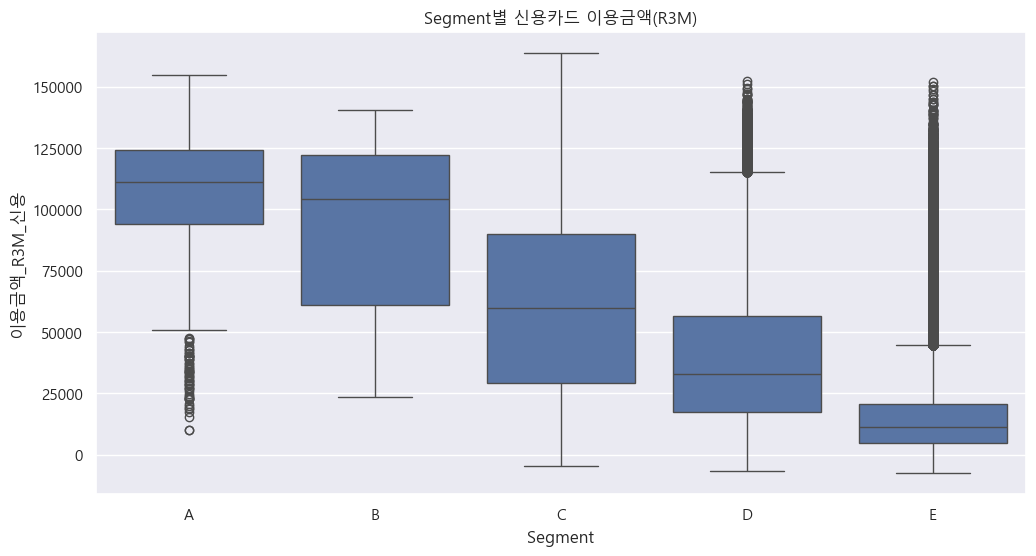

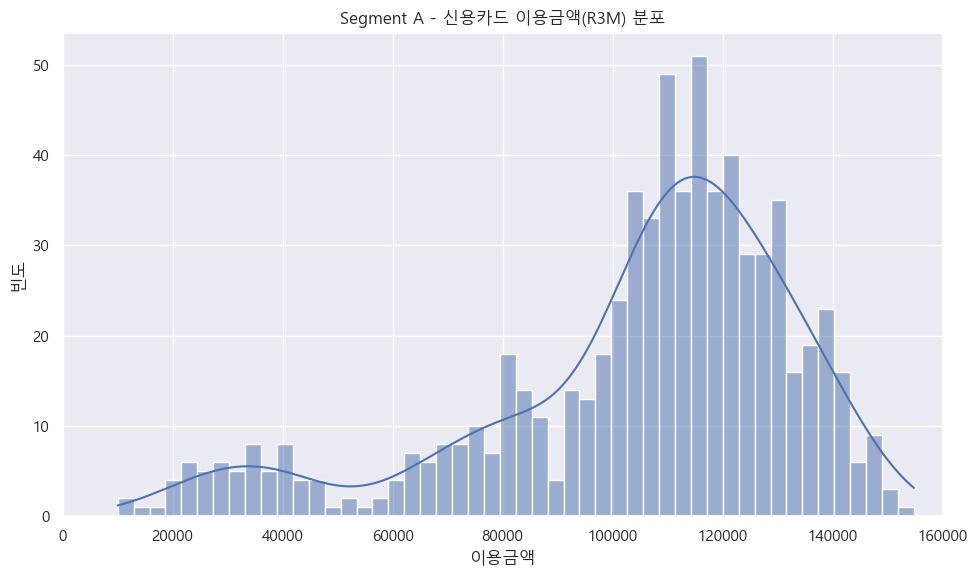

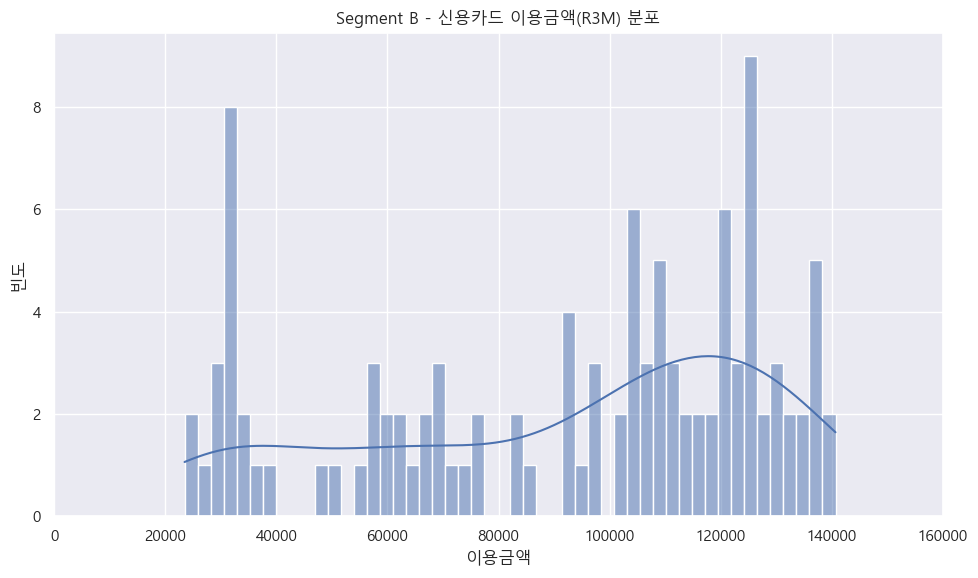

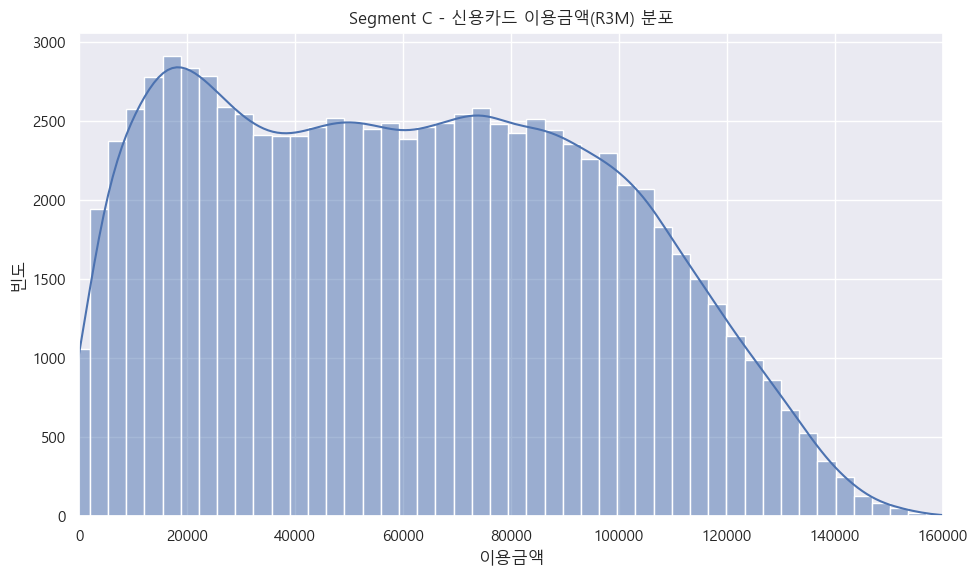

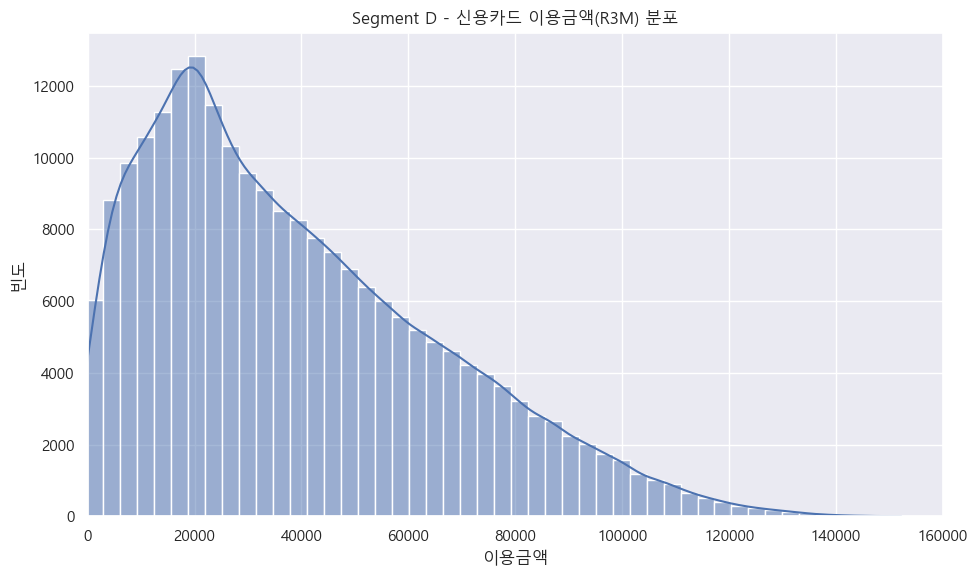

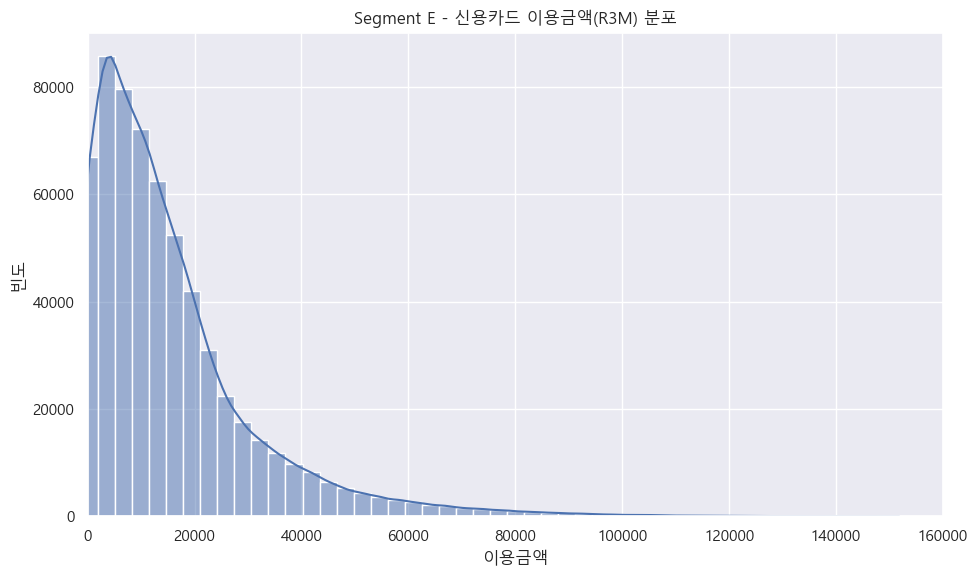

In [63]:
# Boxplot을 이용하여 Segment별 신용카드 이용금액(R3M)의 분포 비교
sns.boxplot(data=df_all, x='Segment', y='이용금액_R3M_신용', order=['A', 'B', 'C', 'D', 'E'])

plt.title("Segment별 신용카드 이용금액(R3M)")
plt.show()


# Segment별 히스토그램을 이용하여 신용카드 이용금액(R3M)의 분포 비교

segments = ['A', 'B', 'C', 'D', 'E']

# x축 공통 범위 설정 (원하는 범위로 조정)
x_min = 0
x_max = 160000


for seg in segments:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_all[df_all['Segment'] == seg], 
                 x='이용금액_R3M_신용', bins=50, kde=True)


    plt.xlim(x_min, x_max)  # ← 공통 범위로 고정
    plt.title(f"Segment {seg} - 신용카드 이용금액(R3M) 분포")
    plt.xlabel("이용금액")
    plt.ylabel("빈도")
    plt.tight_layout()
    plt.show()

###  📊 Segment가 A → E로 갈수록 전체적으로 신용카드 이용금액이 감소하는 경향이 뚜렷하게 나타남.

- Segment A와 B는 높은 소비 규모와 비교적 넓은 분포를 보임
- Segment E는 낮은 중앙값과 좁은 범위를 보
- A, B, D, E 모두 많은 이상치가 있음
- E Segment에서도 고액 이상치가 존재, 전반적 소비 수준은 낮지만 소수 고사용자 포함

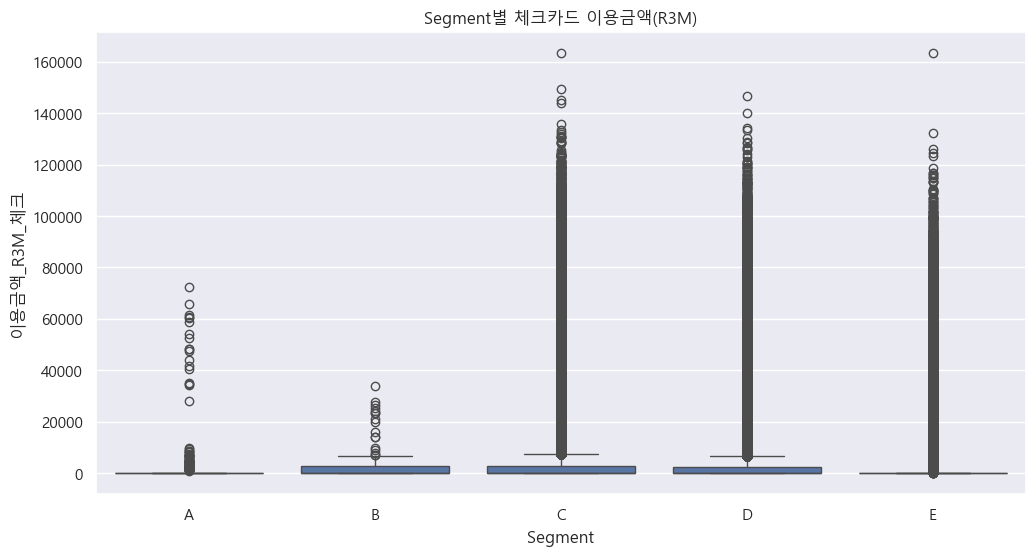

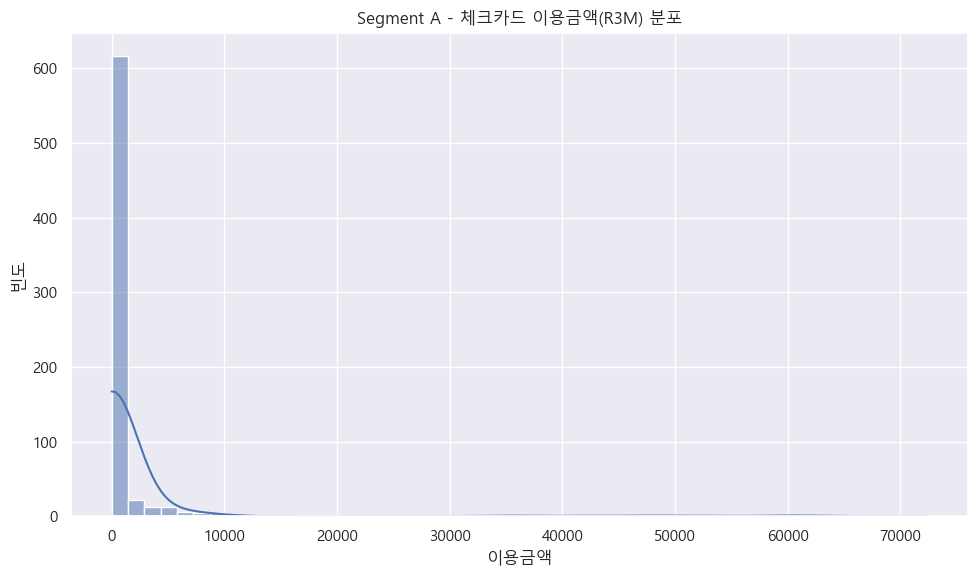

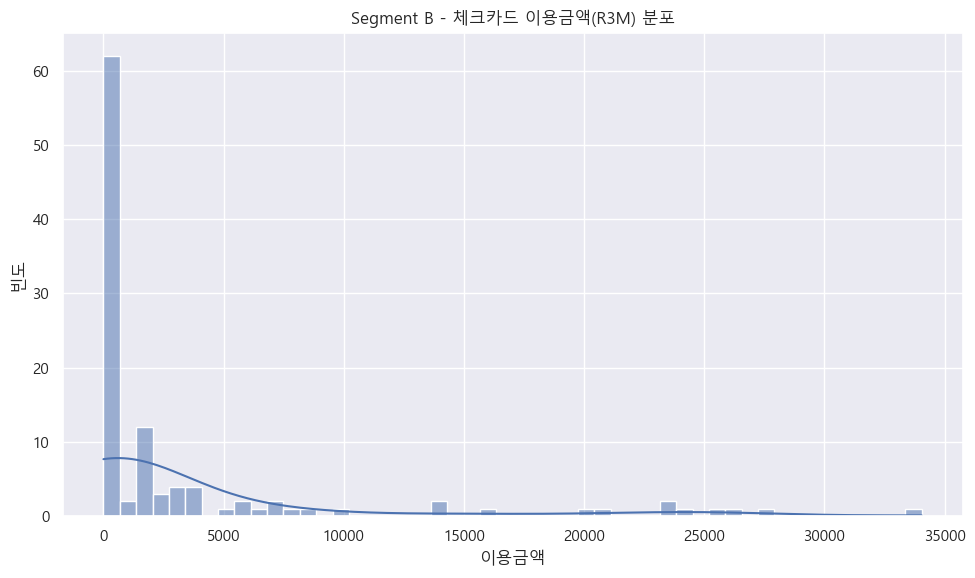

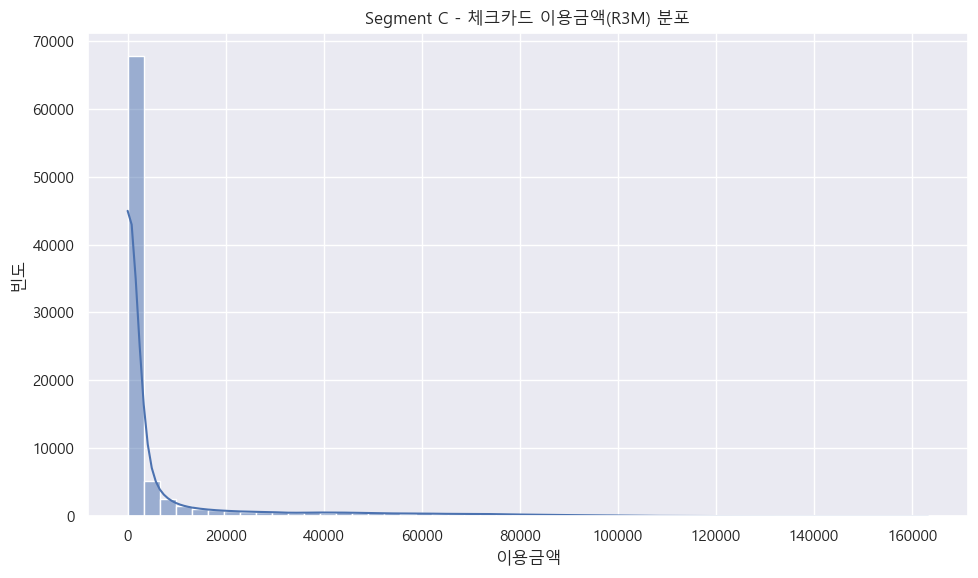

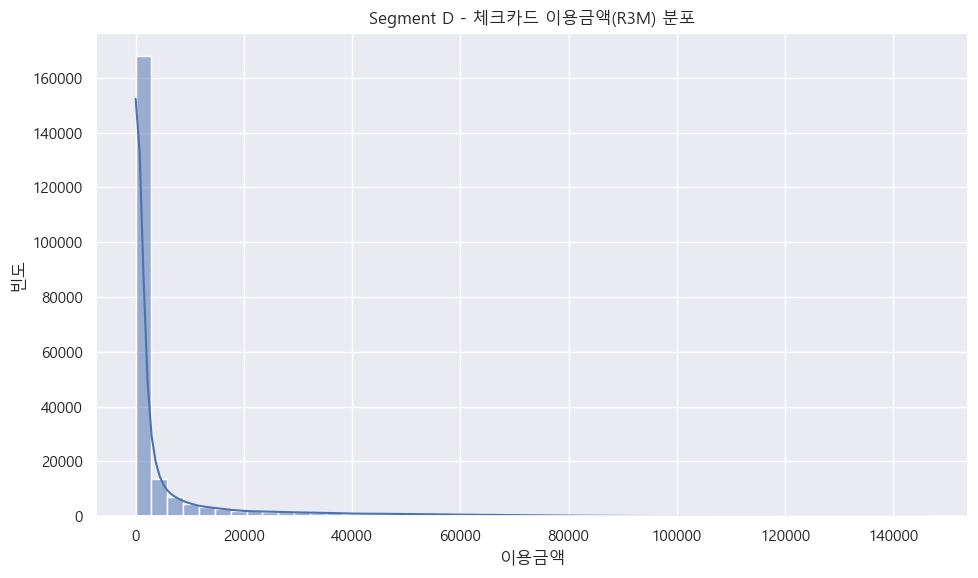

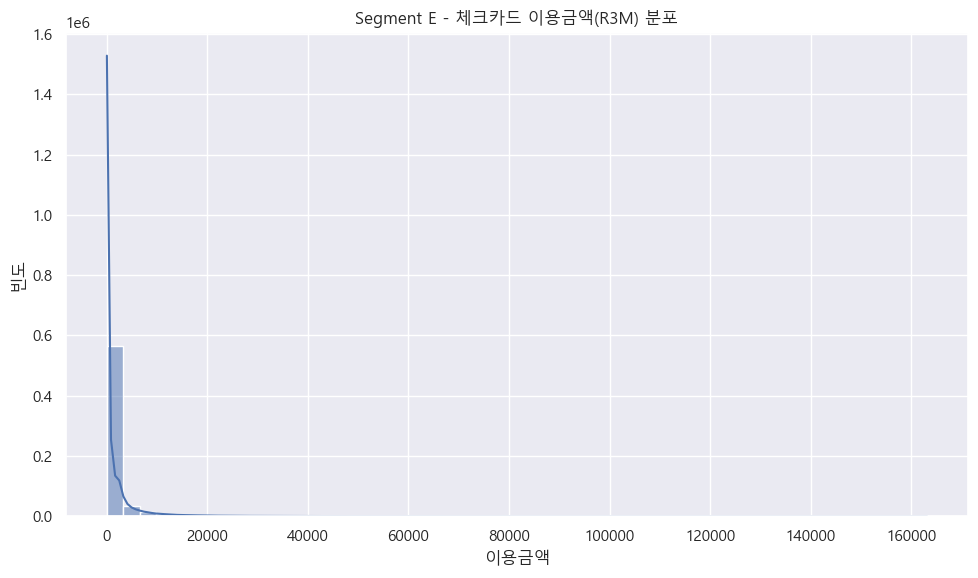

In [32]:
# Boxplot을 이용하여 Segment별 체크카드 이용금액(R3M)의 분포 비교

sns.boxplot(data=df_all, x='Segment', y='이용금액_R3M_체크', order=['A', 'B', 'C', 'D', 'E'])

plt.title("Segment별 체크카드 이용금액(R3M)")
plt.show()

# Segment별 체크카드 이용금액(R3M)의 분포 비교

segments = ['A', 'B', 'C', 'D', 'E']

for seg in segments:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_all[df_all['Segment'] == seg], 
                 x='이용금액_R3M_체크', bins=50, kde=True)
    
    plt.title(f"Segment {seg} - 체크카드 이용금액(R3M) 분포")
    plt.xlabel("이용금액")
    plt.ylabel("빈도")
    plt.tight_layout()
    plt.show()

###  📊 체크카드 이용금액은 금액 규모가 작고 일관성 없는 소비 패턴을 가짐

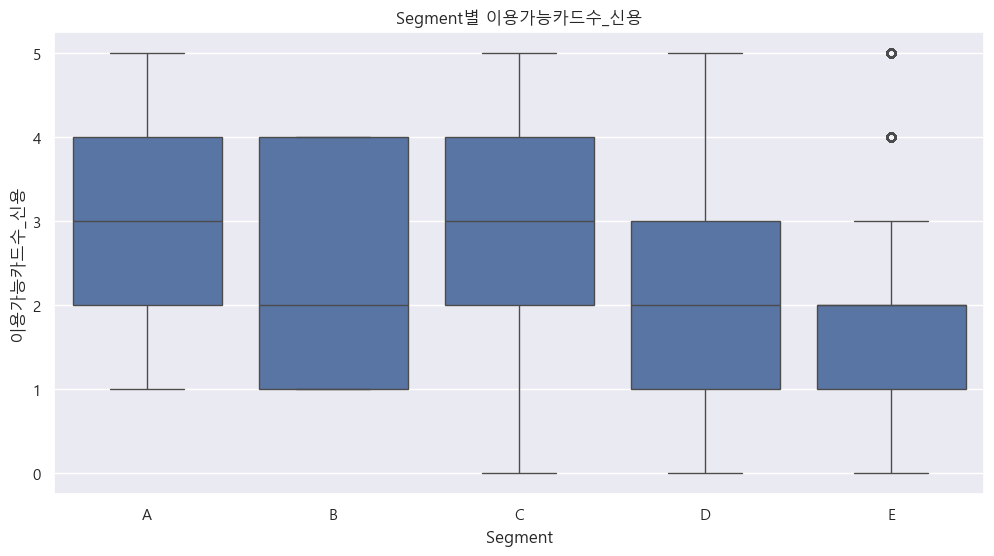

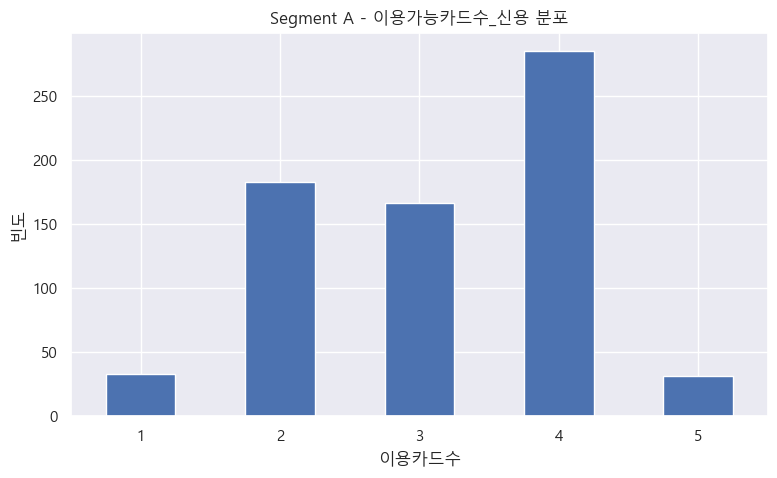

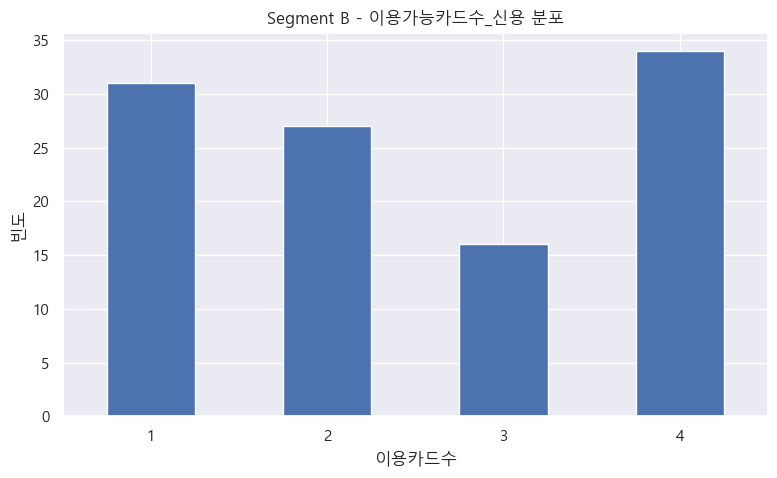

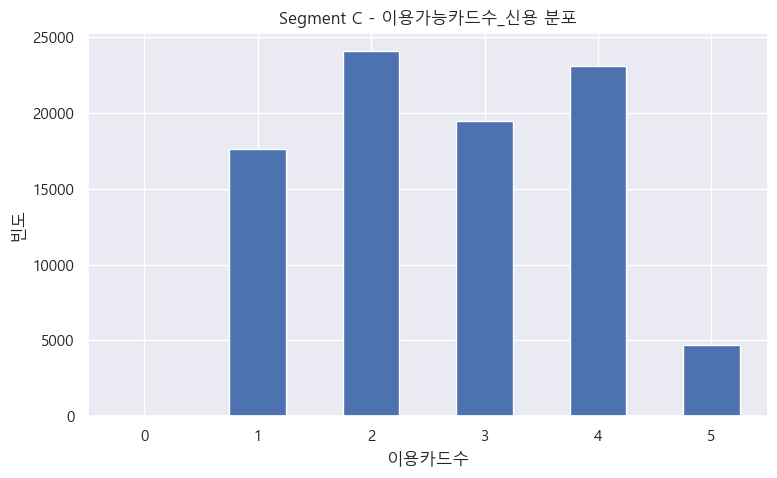

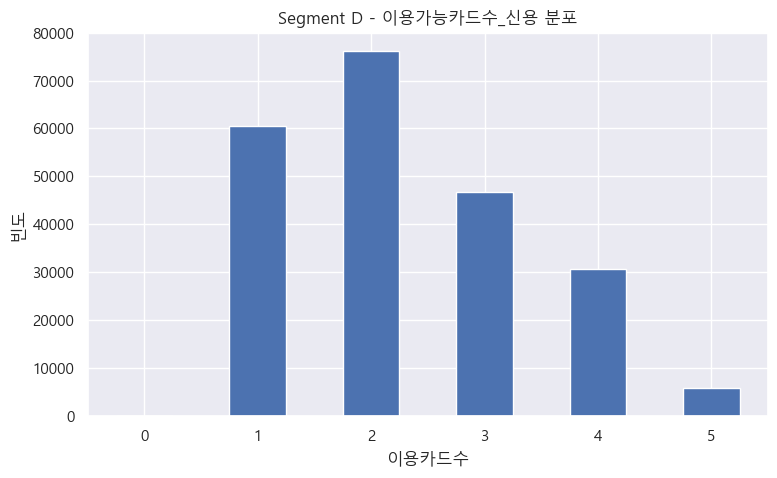

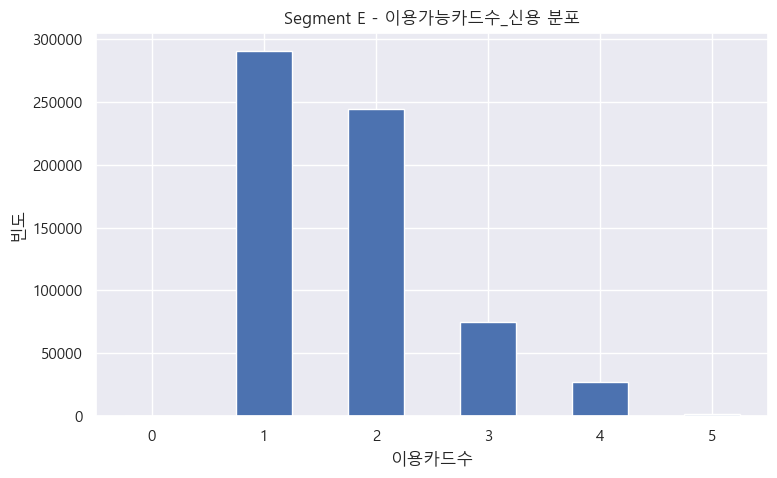

In [36]:
# Boxplot을 이용하여 Segment별 이용가능카드수_신용의 분포 비교
sns.boxplot(data=df_all, x='Segment', y='이용가능카드수_신용', order=['A', 'B', 'C', 'D', 'E'])

plt.title("Segment별 이용가능카드수_신용")
plt.show()


# Segment별 막대그래프를 이용하여 신용카드 이용카드수의 분포 비교

segments = ['A', 'B', 'C', 'D', 'E']

for seg in segments:
    plt.figure(figsize=(8, 5))
    
    # 특정 Segment에서의 값 빈도수 계산 (정수형 변수 대상)
    df_seg = df_all[df_all['Segment'] == seg]
    df_seg['이용가능카드수_신용'].value_counts().sort_index().plot(kind='bar')

    plt.title(f"Segment {seg} - 이용가능카드수_신용 분포")
    plt.xlabel("이용카드수")
    plt.ylabel("빈도")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [85]:
df_A = df_all[df_all['Segment'] == 'A']['이용가능카드수_신용'].value_counts().sort_index()
df_B = df_all[df_all['Segment'] == 'B']['이용가능카드수_신용'].value_counts().sort_index()
df_E = df_all[df_all['Segment'] == 'E']['이용가능카드수_신용'].value_counts().sort_index()

print(f'이용카드수 A: {df_A}')
print(f'이용카드수 B: {df_B}')
print(f'이용카드수 E: {df_E}')

이용카드수 A: 이용가능카드수_신용
1     33
2    183
3    166
4    285
5     31
Name: count, dtype: int64
이용카드수 B: 이용가능카드수_신용
1    31
2    27
3    16
4    34
Name: count, dtype: int64
이용카드수 E: 이용가능카드수_신용
0       103
1    290496
2    244205
3     74737
4     26911
5      1606
Name: count, dtype: int64


###  📊 Segment E는 전체적으로 1~2장 수준에 몰림

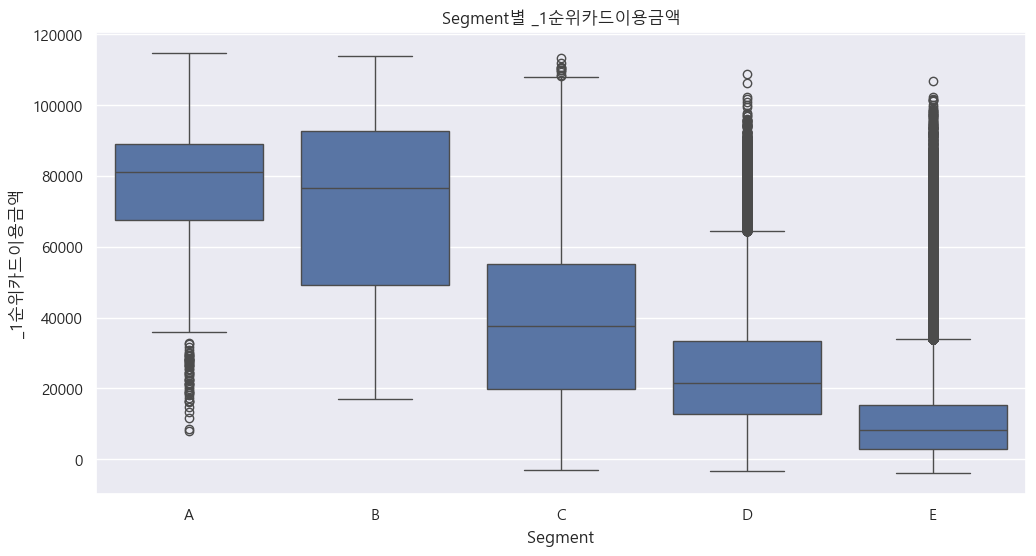

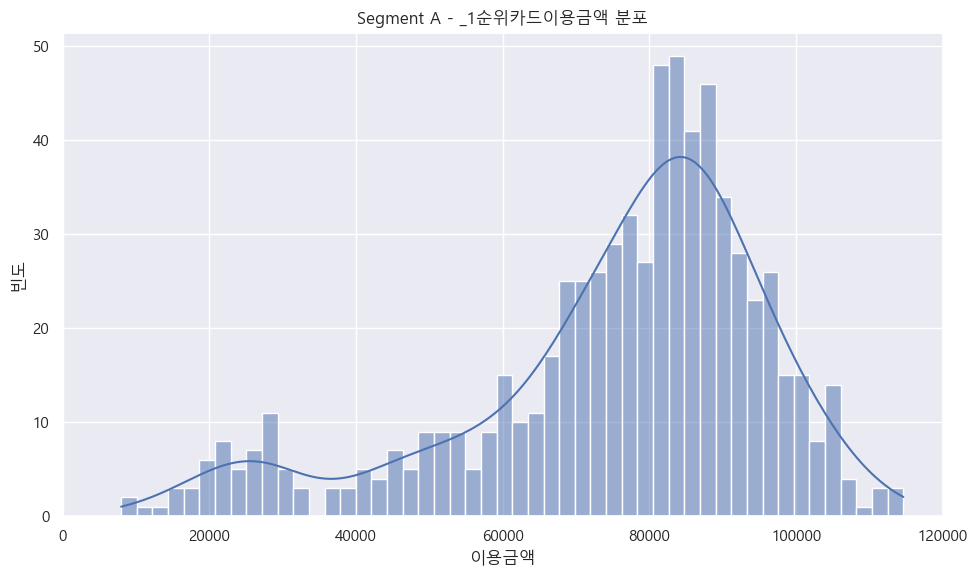

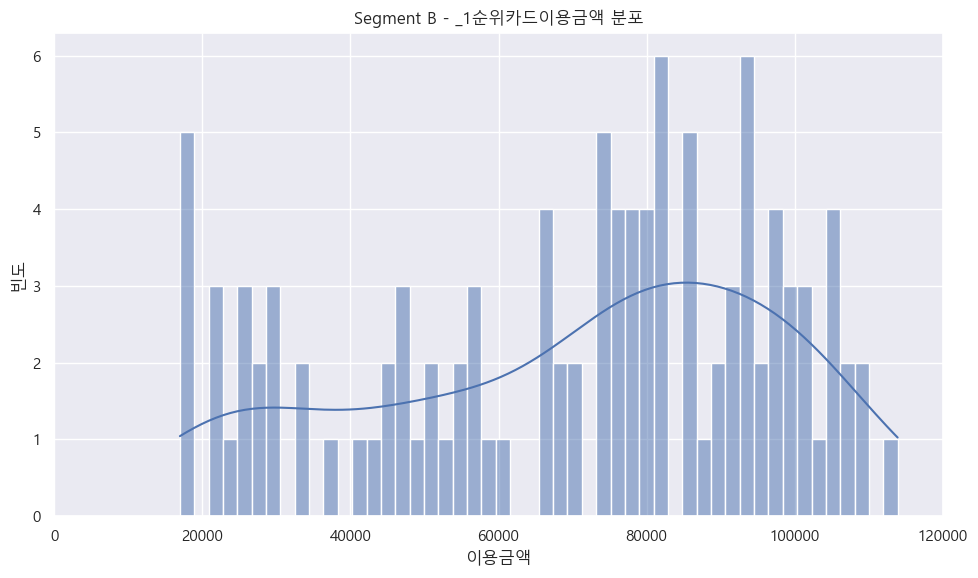

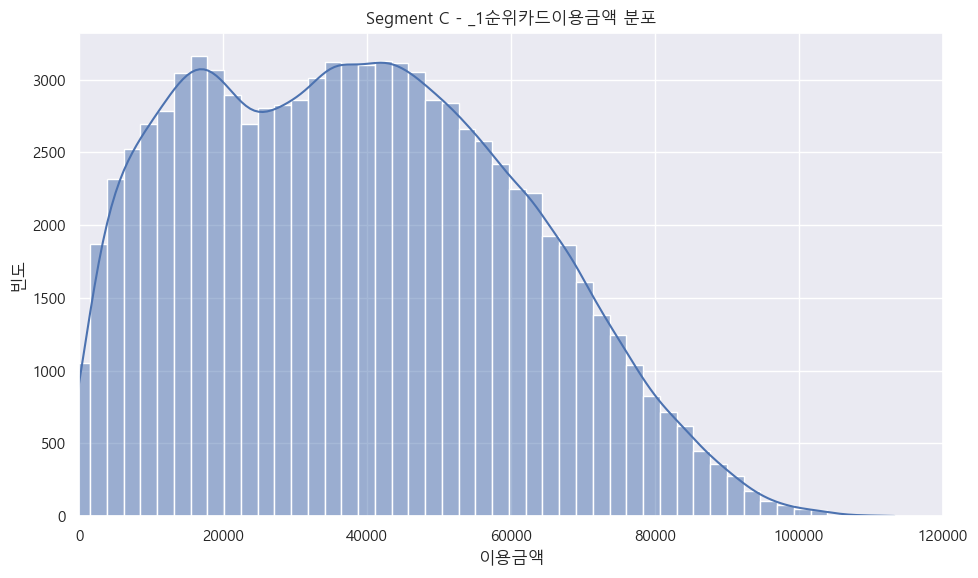

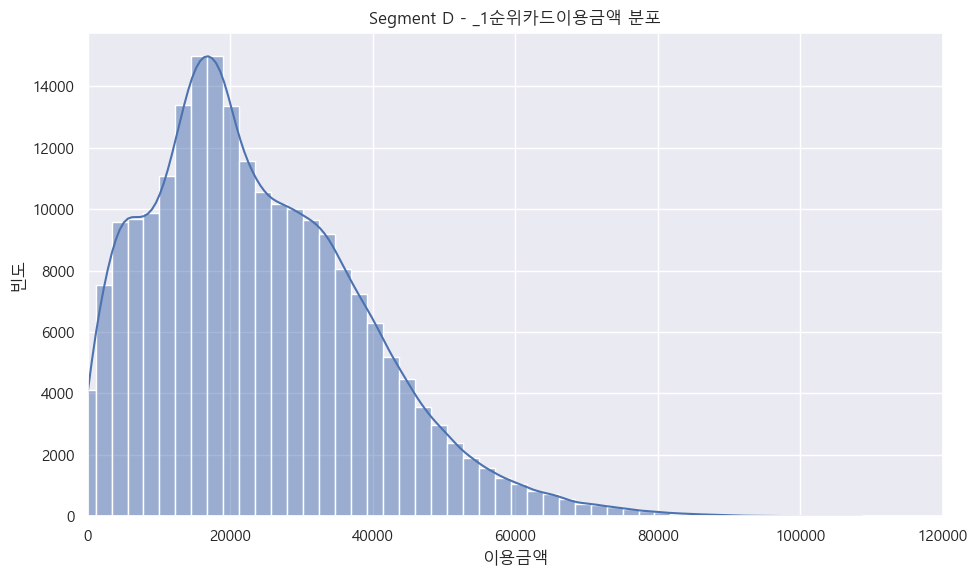

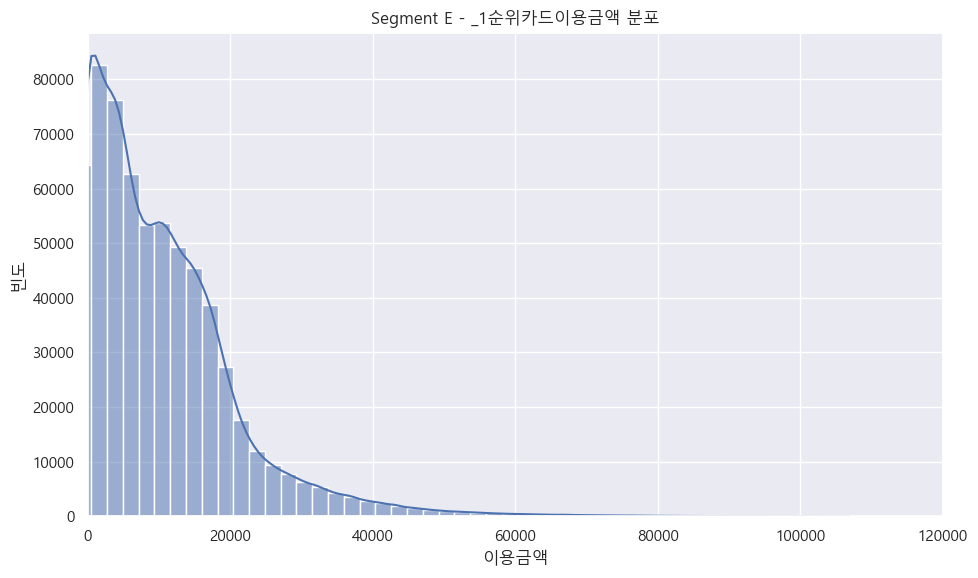

In [44]:
# Boxplot을 이용하여 Segment별 _1순위카드이용금액의 분포 비교
sns.boxplot(data=df_all, x='Segment', y='_1순위카드이용금액', order=['A', 'B', 'C', 'D', 'E'])

plt.title("Segment별 _1순위카드이용금액")
plt.show()


segments = ['A', 'B', 'C', 'D', 'E']

# x축 공통 범위 설정 (원하는 범위로 조정)
x_min = 0
x_max = 120000

for seg in segments:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_all[df_all['Segment'] == seg], 
                 x='_1순위카드이용금액', bins=50, kde=True)

    
    plt.xlim(x_min, x_max)  # ← 공통 범위로 고정
    plt.title(f"Segment {seg} - _1순위카드이용금액 분포")
    plt.xlabel("이용금액")
    plt.ylabel("빈도")
    plt.tight_layout()
    plt.show()

###  📊 신용카드 이용 금액과 유사한 형태를 보임

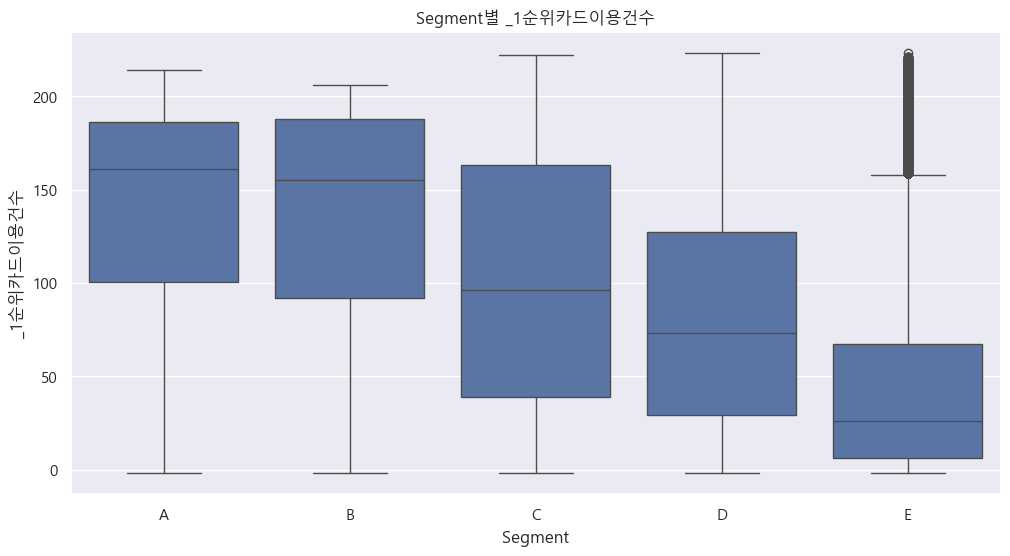

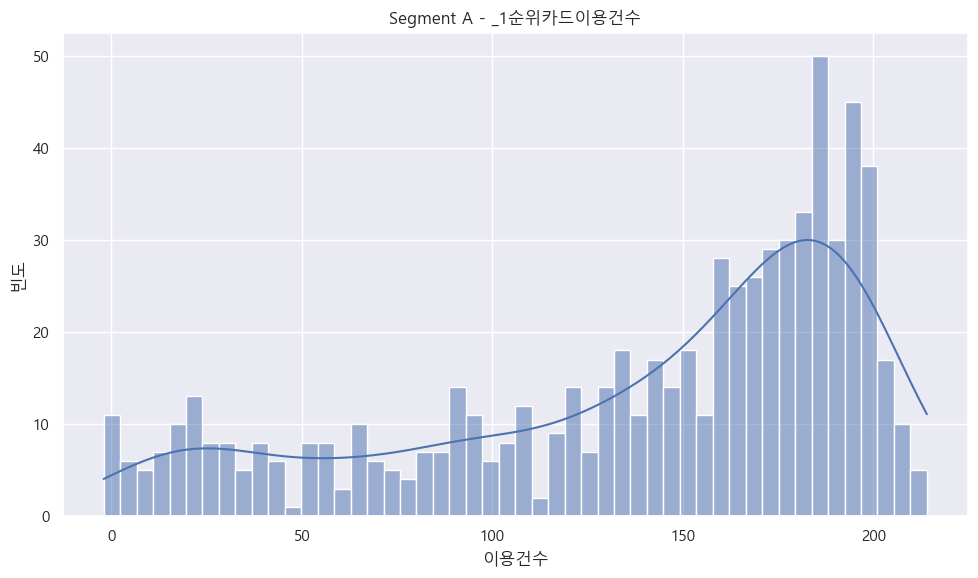

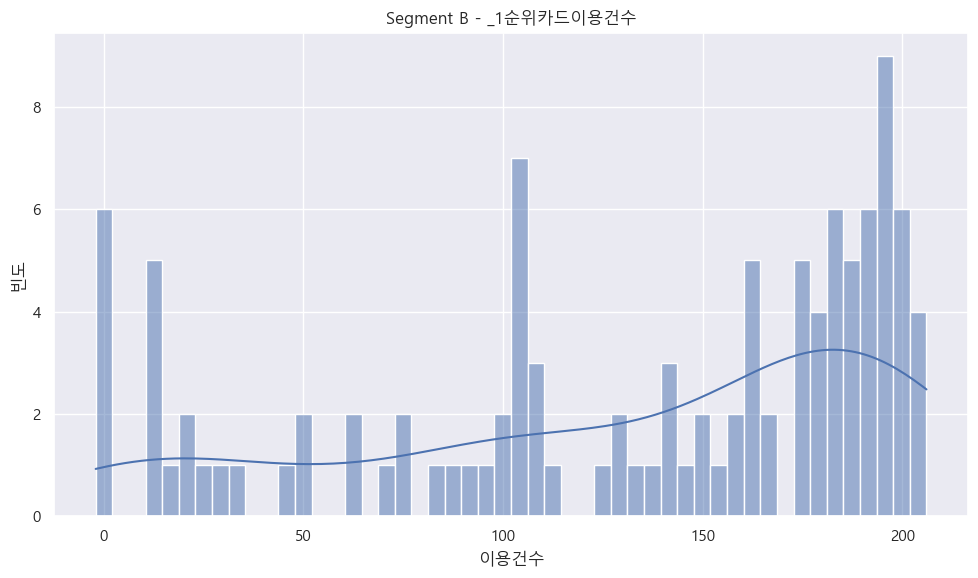

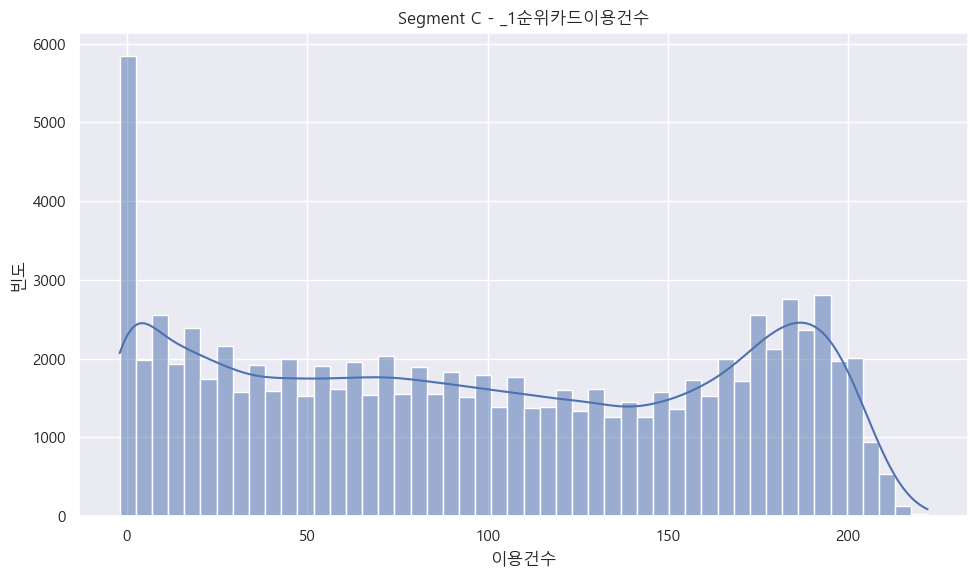

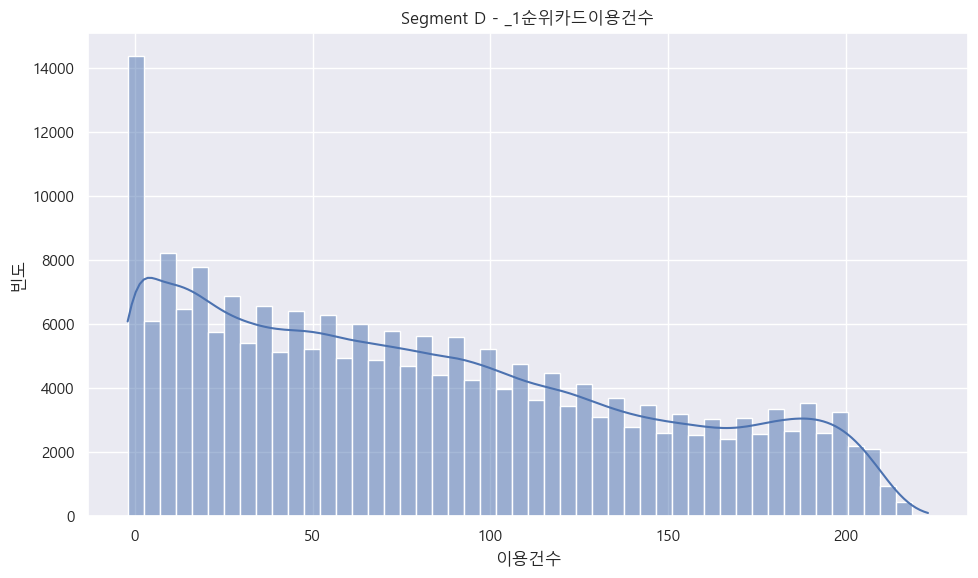

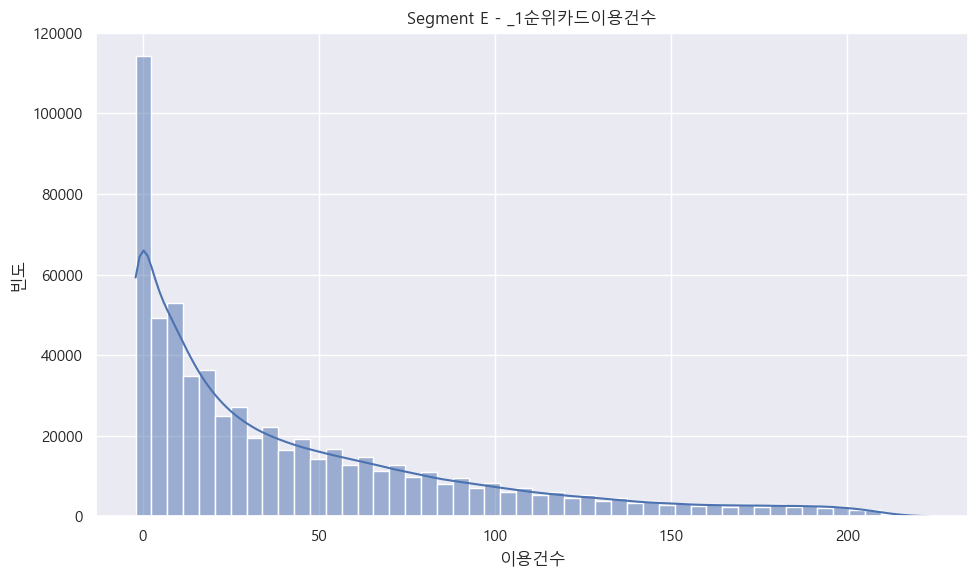

In [42]:
# Boxplot을 이용하여 Segment별 _1순위카드이용금액의 분포 비교
sns.boxplot(data=df_all, x='Segment', y='_1순위카드이용건수', order=['A', 'B', 'C', 'D', 'E'])

plt.title("Segment별 _1순위카드이용건수")
plt.show()


segments = ['A', 'B', 'C', 'D', 'E']

for seg in segments:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_all[df_all['Segment'] == seg], 
                 x='_1순위카드이용건수', bins=50, kde=True)
    
    plt.title(f"Segment {seg} - _1순위카드이용건수")
    plt.xlabel("이용건수")
    plt.ylabel("빈도")
    plt.tight_layout()
    plt.show()

###  📊 Segment A, B: 주력 카드 이용 건수가 가장 많고, 중앙값이 높음
- 주력 카드에 대한 충성도가 높은 고객일 가능성

###  📊 Segment C → D → E로 갈수록 이용 건수의 중앙값 및 전체 분포가 감소
- 카드 이용 활동성이 떨어지는 고객군으로 해석 가능

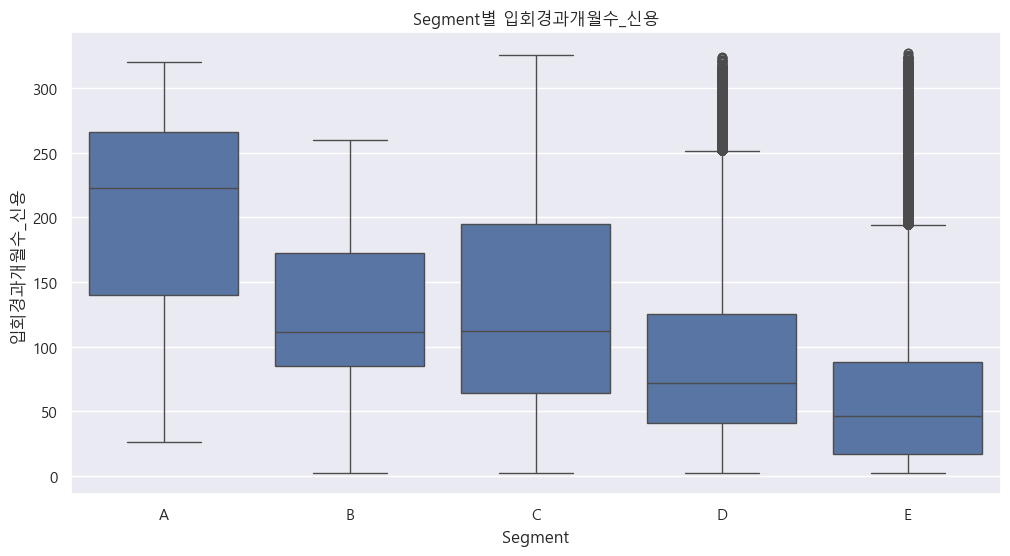

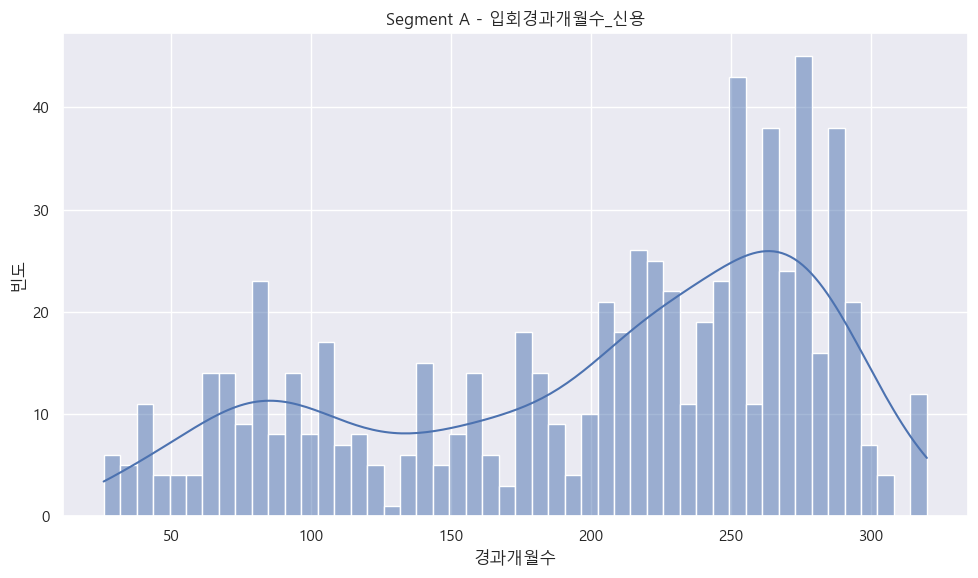

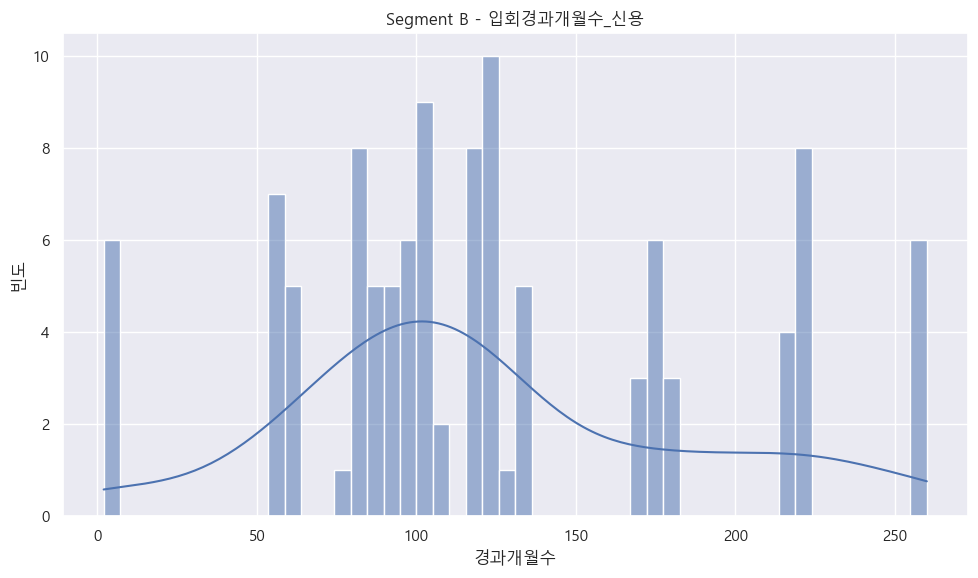

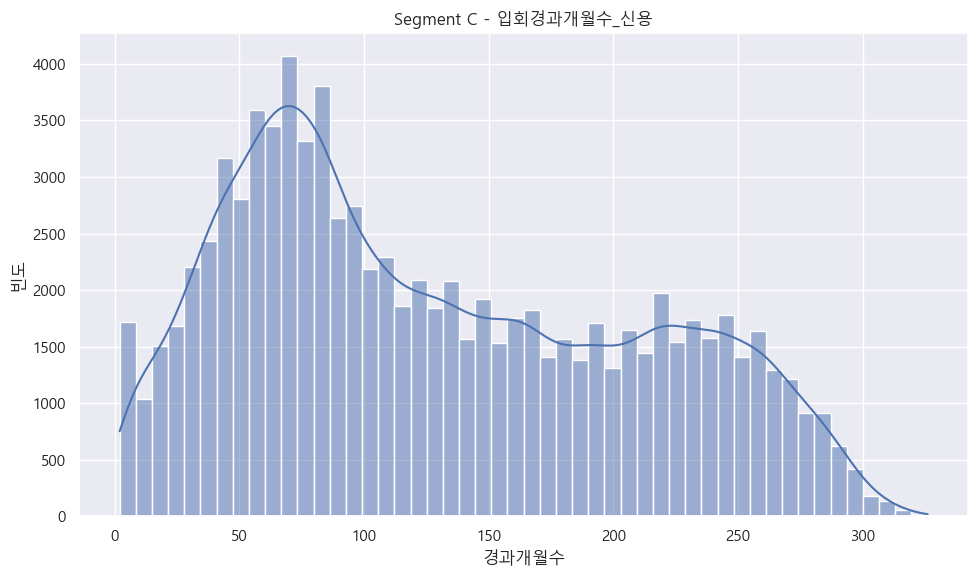

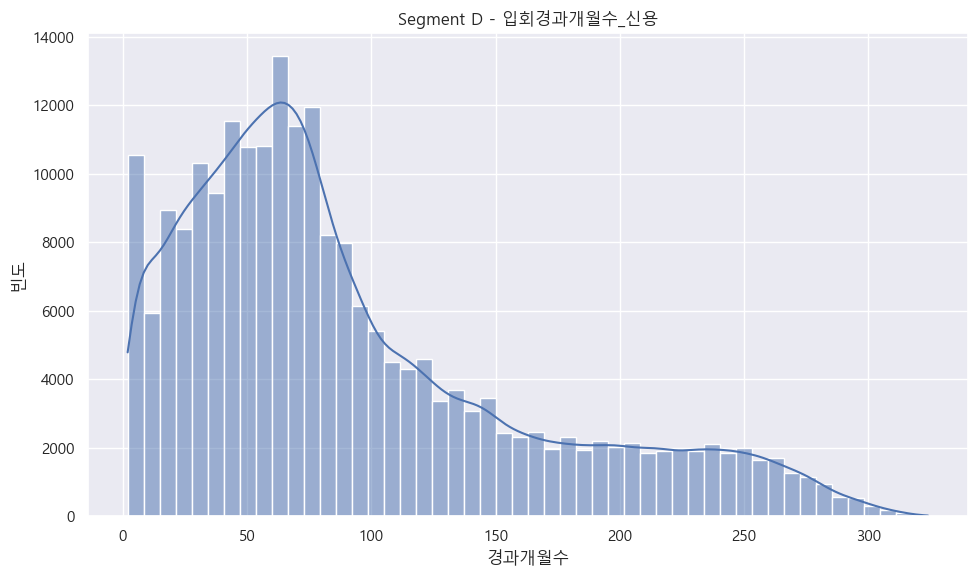

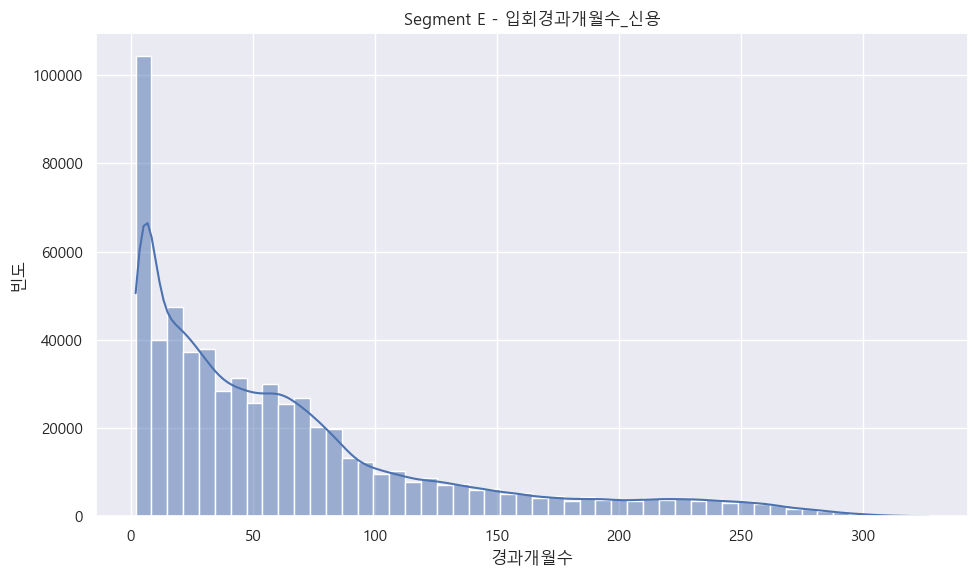

In [46]:
# Boxplot을 이용하여 Segment별 _1순위카드이용금액의 분포 비교
sns.boxplot(data=df_all, x='Segment', y='입회경과개월수_신용', order=['A', 'B', 'C', 'D', 'E'])

plt.title("Segment별 입회경과개월수_신용")
plt.show()


segments = ['A', 'B', 'C', 'D', 'E']

for seg in segments:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_all[df_all['Segment'] == seg], 
                 x='입회경과개월수_신용', bins=50, kde=True)
    
    plt.title(f"Segment {seg} - 입회경과개월수_신용")
    plt.xlabel("경과개월수")
    plt.ylabel("빈도")
    plt.tight_layout()
    plt.show()

###  📊 Segment A → E로 갈수록 입회 경과 개월 수(신용카드 보유기간)가 감소
- 즉, Segment E는 신규 고객, Segment A는 장기 고객일 가능성 높음

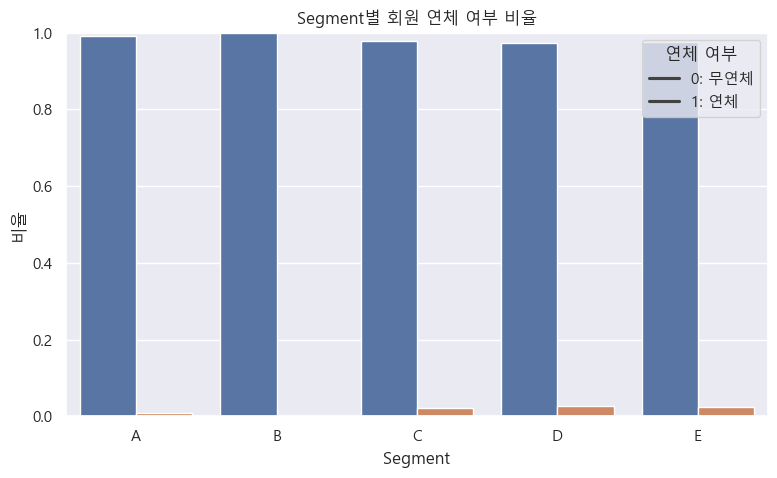

In [58]:
# 1. Segment별, 연체여부별 비율 계산
proportion_df = (
    df_all.groupby('Segment')['회원여부_연체']
    .value_counts(normalize=True)
    .rename('비율')
    .reset_index()
)

# 2. 시각화 (Segment별로 hue 적용)
plt.figure(figsize=(8, 5))
sns.barplot(data=proportion_df, x='Segment', y='비율', hue='회원여부_연체')

plt.title("Segment별 회원 연체 여부 비율")
plt.ylabel("비율")
plt.xlabel("Segment")
plt.ylim(0, 1)
plt.legend(title="연체 여부", labels=["0: 무연체", "1: 연체"])
plt.tight_layout()
plt.show()

###  📊 연체 여부는 세그먼트별로 큰 차이를 보이지 않음
- C이하에서 연체 비율이 약간 증가함 

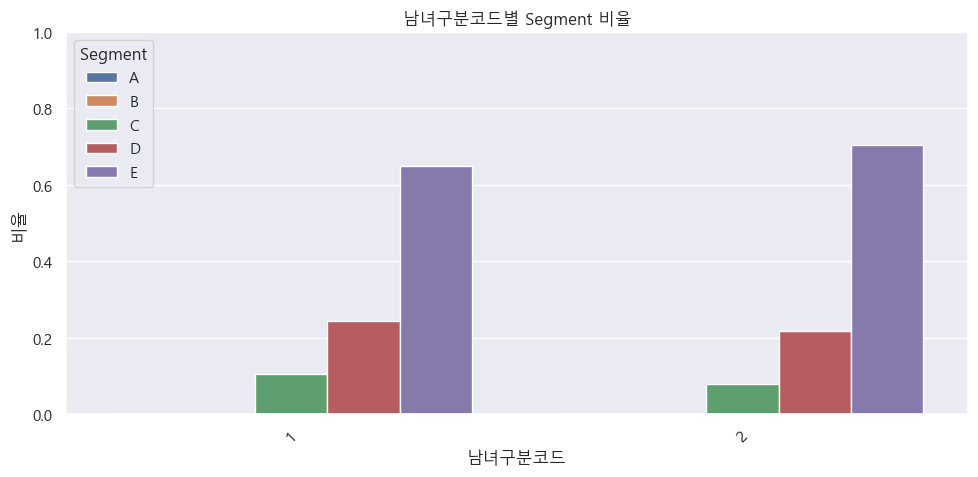

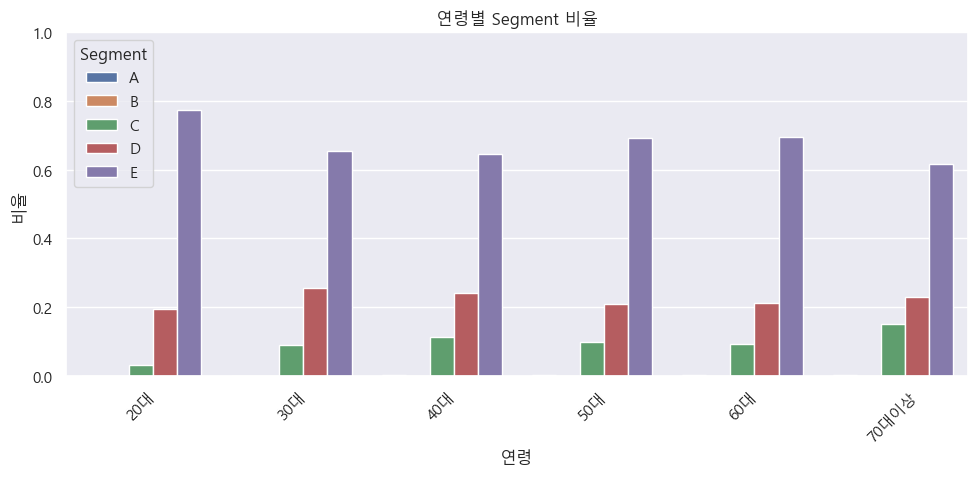

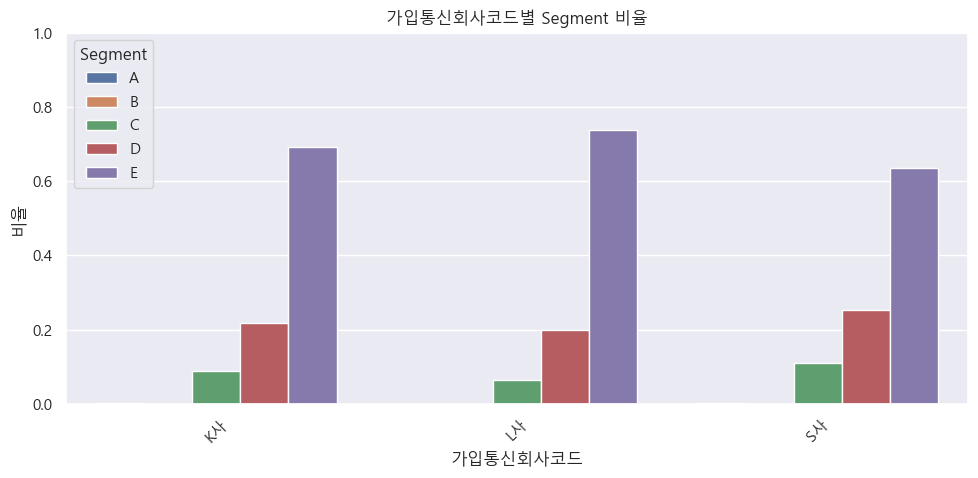

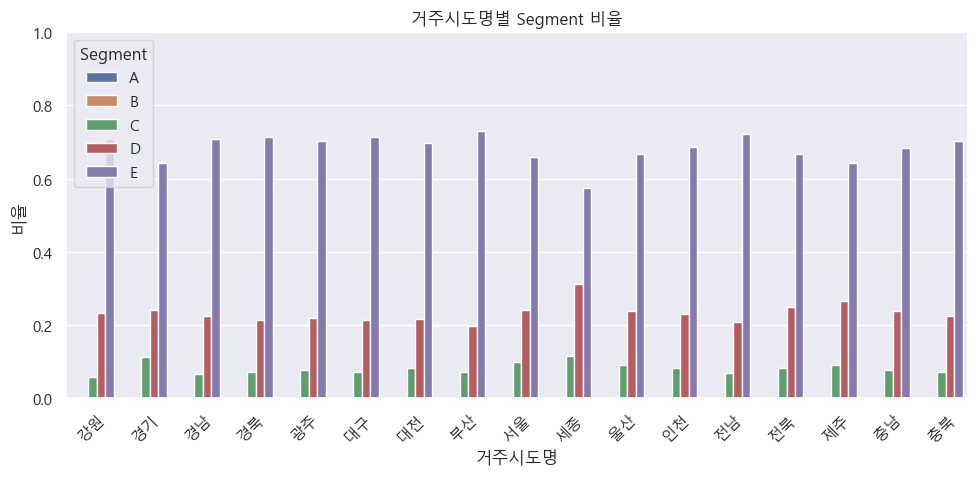

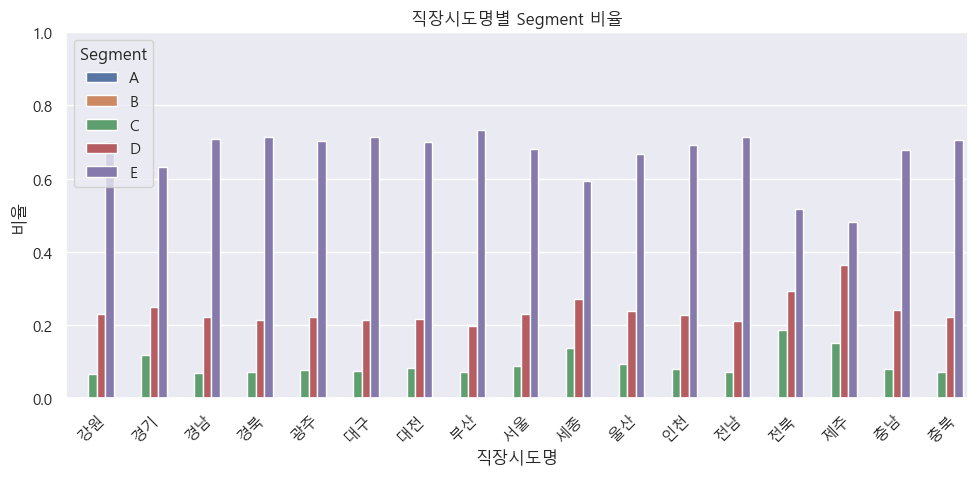

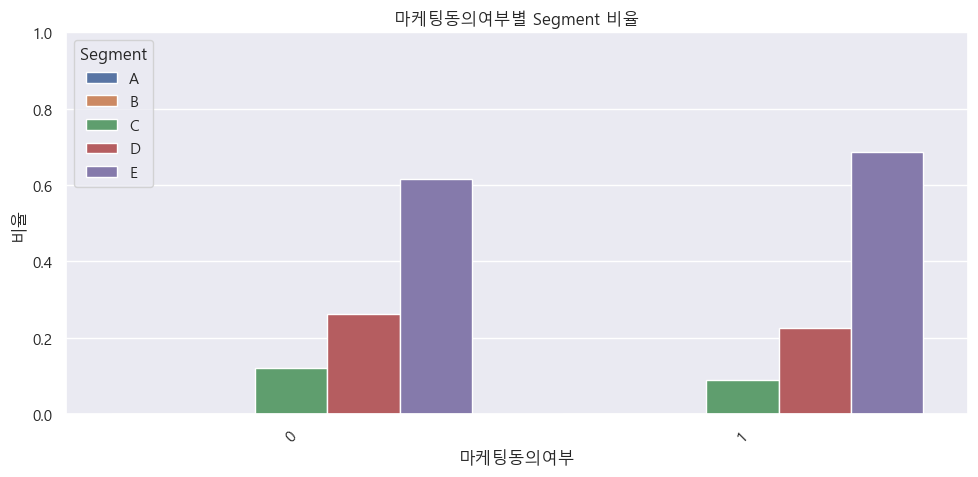

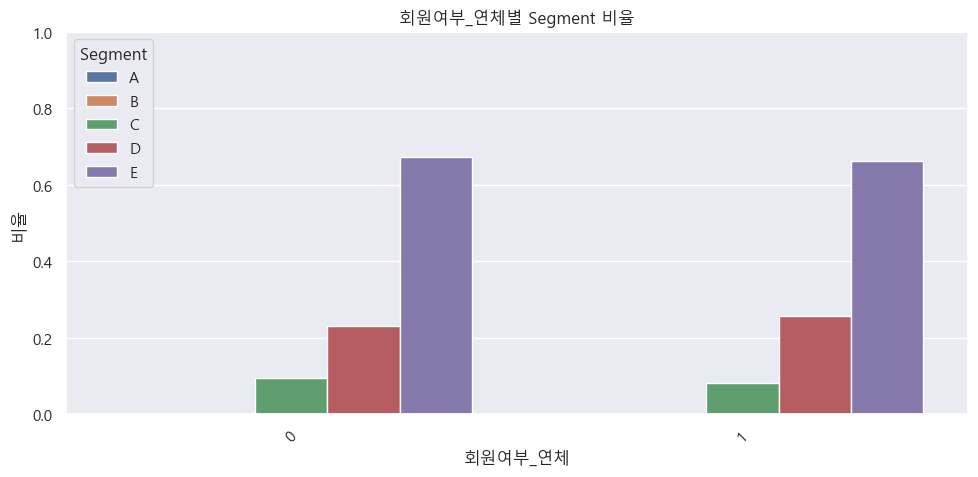

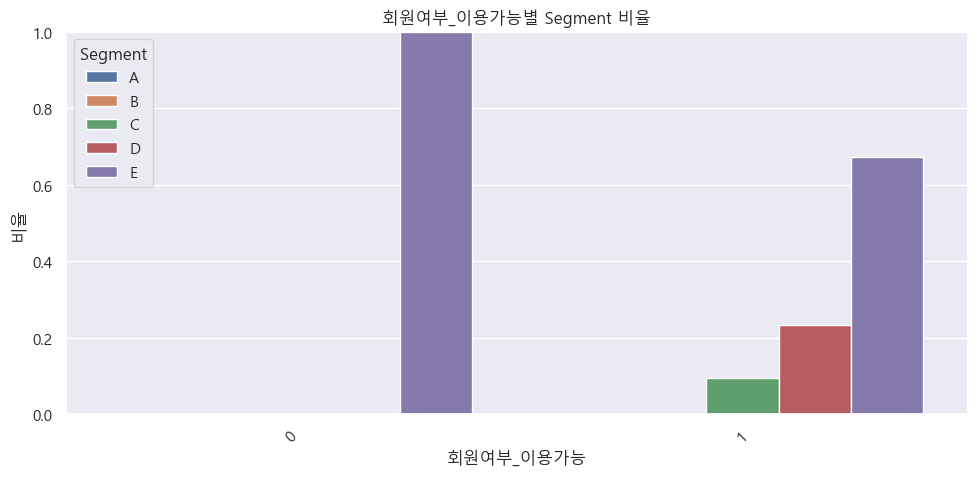

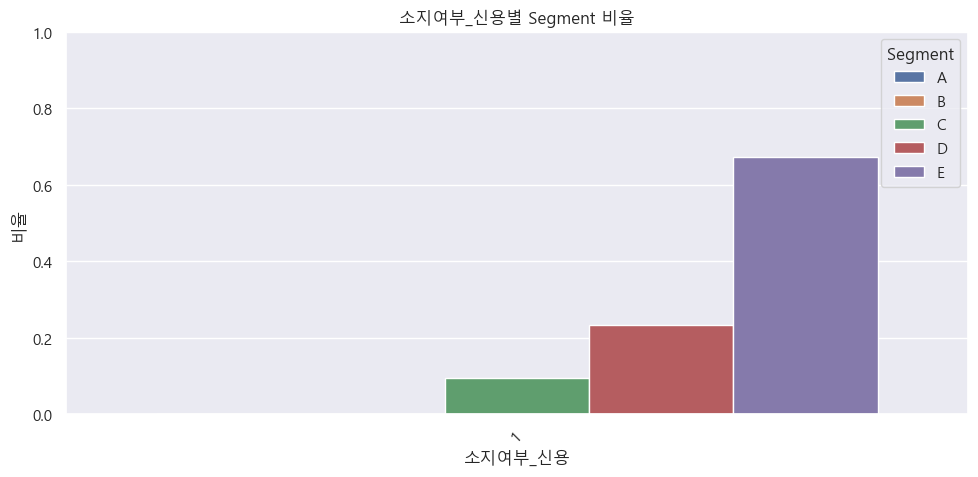

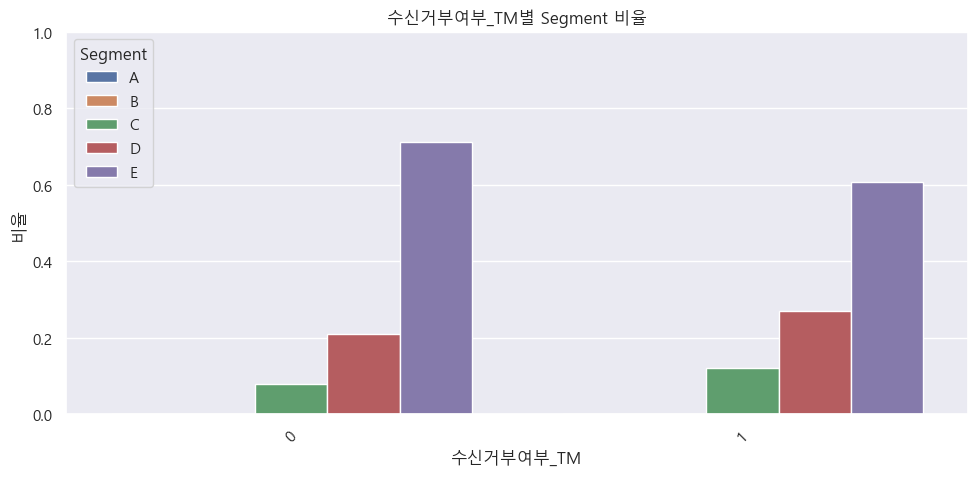

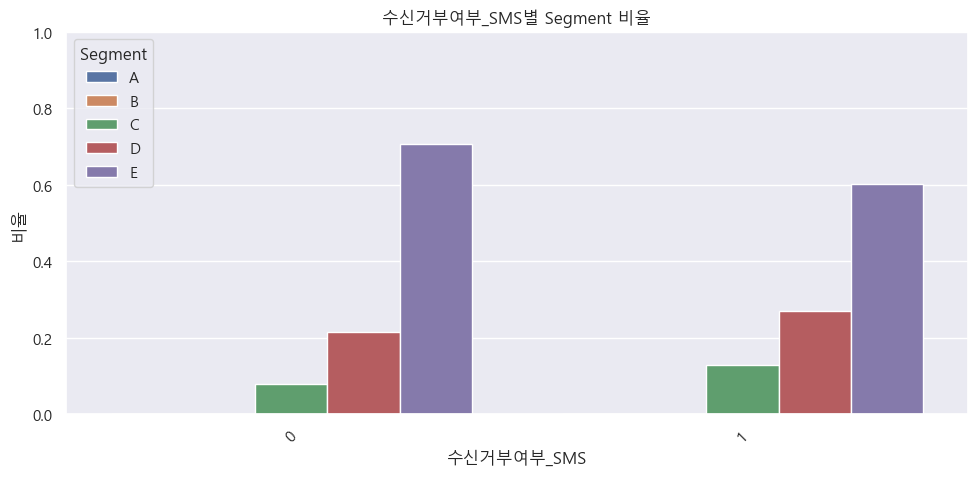

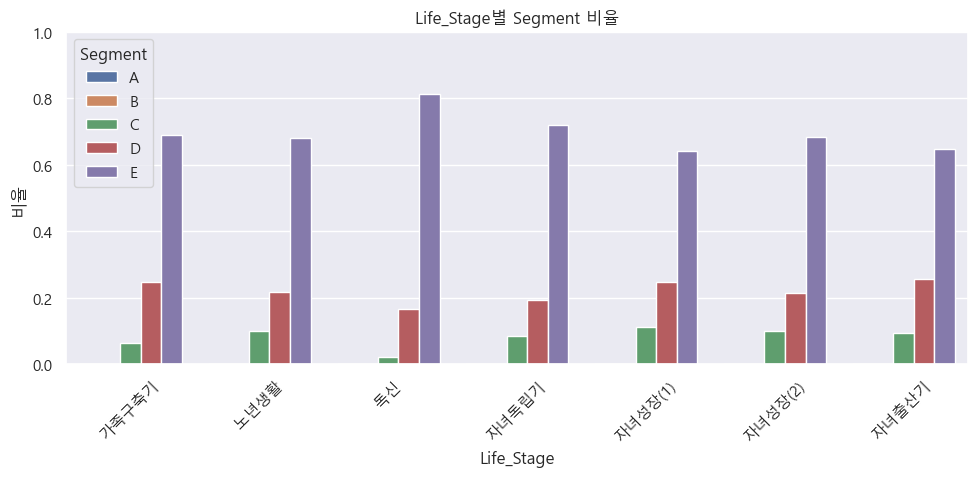

In [99]:
# Segment 순서 고정
df_all['Segment'] = pd.Categorical(df_all['Segment'], categories=['A', 'B', 'C', 'D', 'E'], ordered=True)

categorical_cols = [
    '남녀구분코드', '연령', '가입통신회사코드', '거주시도명', '직장시도명',
    '마케팅동의여부', '회원여부_연체', '회원여부_이용가능', '소지여부_신용',
    '수신거부여부_TM', '수신거부여부_SMS', 'Life_Stage'
]

for col in categorical_cols:
    # 비율 계산
    prop_df = (
        df_all.groupby(col)['Segment']
        .value_counts(normalize=True)
        .rename('비율')
        .reset_index()
    )

    plt.figure(figsize=(10, 5))
    sns.barplot(data=prop_df, x=col, y='비율', hue='Segment')
    plt.title(f"{col}별 Segment 비율")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


###  📊 범주형 변수를 통해 유의미한 인사이트 도출은 어려운 것으로 추정

- 비슷한 비율로 구성
- 라이프 스테이지에서 독신의 경우 C와 E의 비율 차가 가장 크게 나타남

In [102]:
corr = df_all.select_dtypes(include='number').corr()
high_corr = np.where(abs(corr) > 0.9)
high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print("상관관계 0.9 이상 변수쌍:", high_corr_pairs)

상관관계 0.9 이상 변수쌍: [('소지카드수_유효_신용', '소지카드수_이용가능_신용'), ('입회일자_신용', '입회경과개월수_신용'), ('수신거부여부_DM', '수신거부여부_메일'), ('유효카드수_신용체크', '이용가능카드수_신용체크'), ('유효카드수_신용', '이용가능카드수_신용'), ('유효카드수_신용_가족', '이용가능카드수_신용_가족'), ('유효카드수_신용_가족', '이용카드수_신용_가족'), ('유효카드수_신용_가족', '이용금액_R3M_신용_가족'), ('유효카드수_체크', '이용가능카드수_체크'), ('이용가능카드수_신용', '이용카드수_신용'), ('이용가능카드수_신용_가족', '이용카드수_신용_가족'), ('이용가능카드수_신용_가족', '이용금액_R3M_신용_가족'), ('이용카드수_신용_가족', '이용금액_R3M_신용_가족'), ('이용금액_R3M_신용체크', '이용금액_R3M_신용'), ('이용금액_R3M_신용', '_1순위카드이용금액'), ('_2순위카드이용금액', '_2순위카드이용건수'), ('최종유효년월_신용_이용가능', '최종유효년월_신용_이용'), ('최종카드발급일자', '최종카드발급경과월'), ('보유여부_해외겸용_본인', '이용가능여부_해외겸용_본인'), ('보유여부_해외겸용_신용_본인', '이용가능여부_해외겸용_신용_본인'), ('보유여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인'), ('이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인'), ('기본연회비_B0M', '청구금액_기본연회비_B0M'), ('제휴연회비_B0M', '청구금액_제휴연회비_B0M')]


###  📊 상관관계가 높은 것은 하나로 통합 및 대표 하나만 남기고 제거가 필요

<Axes: >

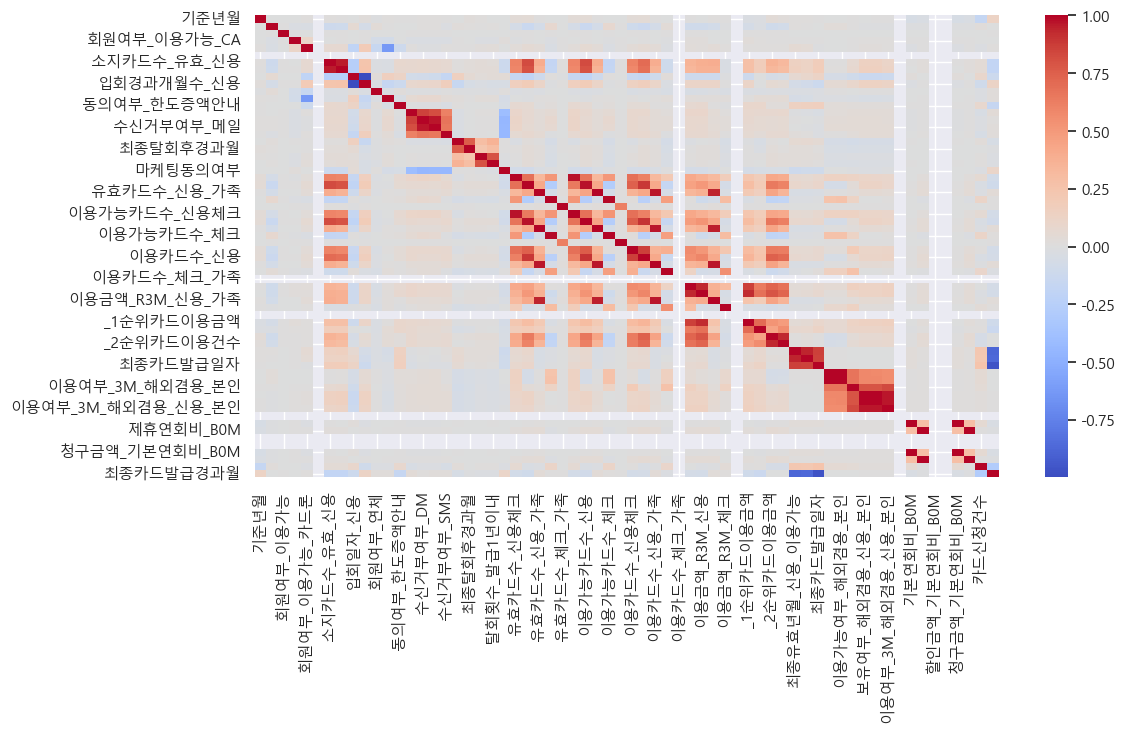

In [106]:
sns.heatmap(corr, cmap='coolwarm')

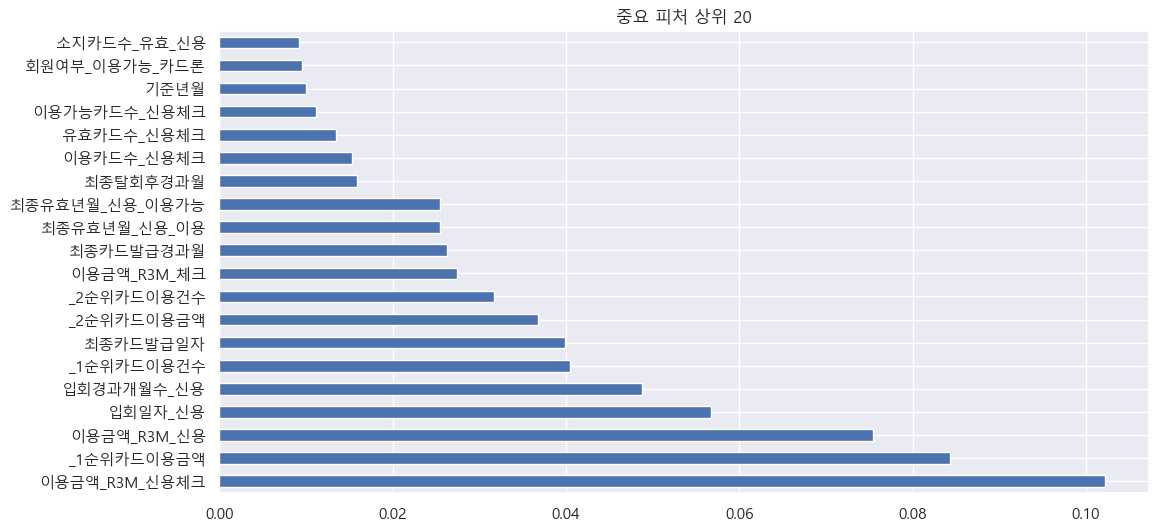

In [111]:
X = df_model.drop(columns=['Segment', 'ID']) # ✅ 예측에 불필요하거나 타겟인 열 제거
y = LabelEncoder().fit_transform(df_model['Segment']) # ✅ 문자열을 숫자로 변환

X = pd.get_dummies(X)  # 범주형 인코딩
model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(20).plot(kind='barh')
plt.title("중요 피처 상위 20")
plt.show()

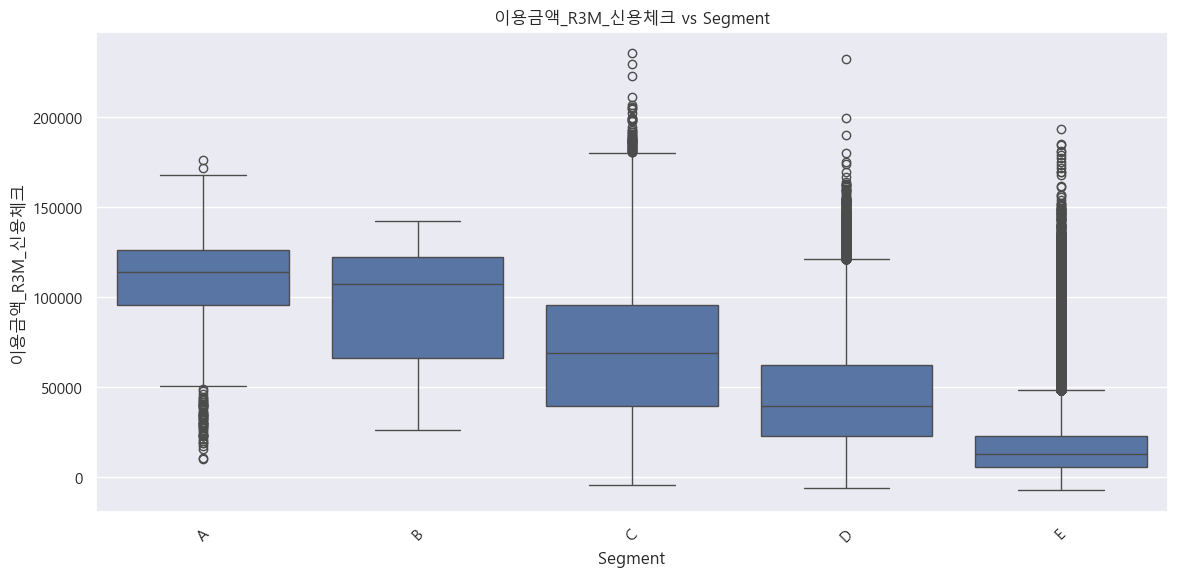

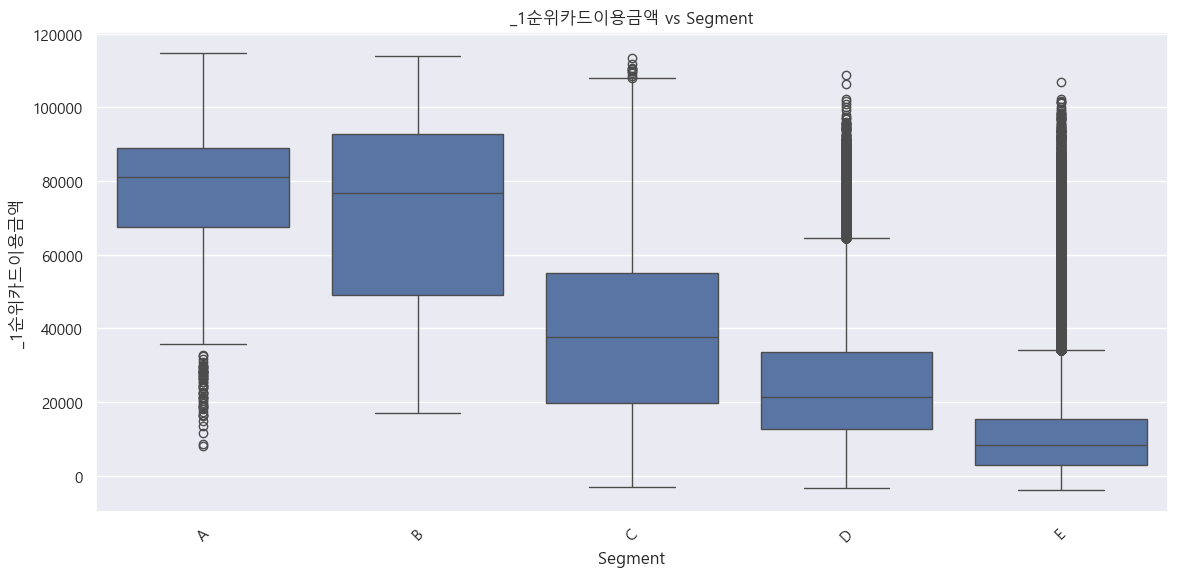

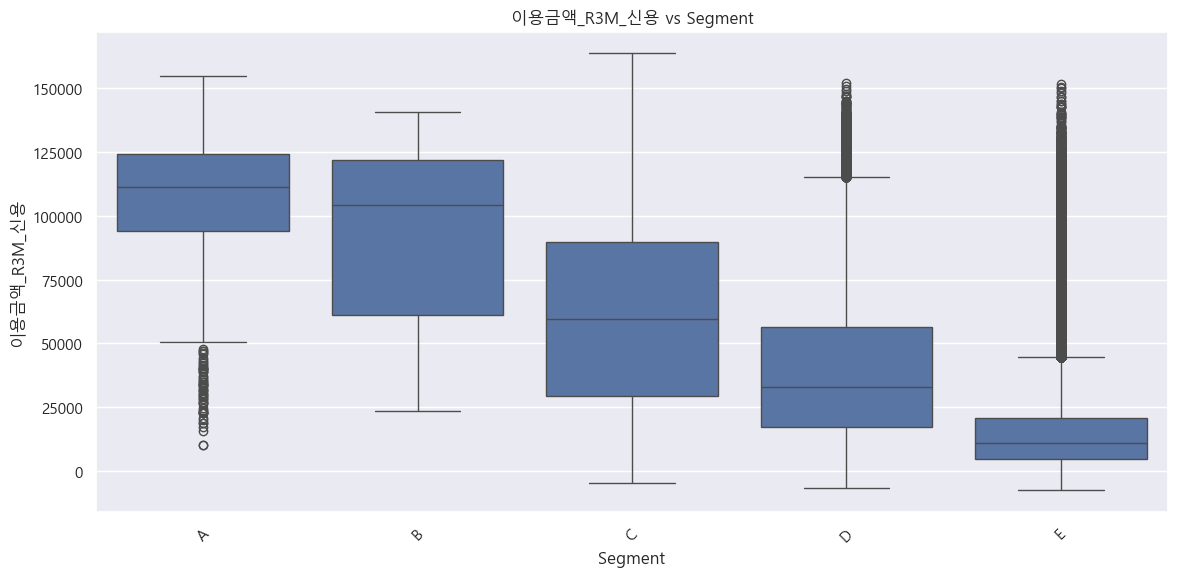

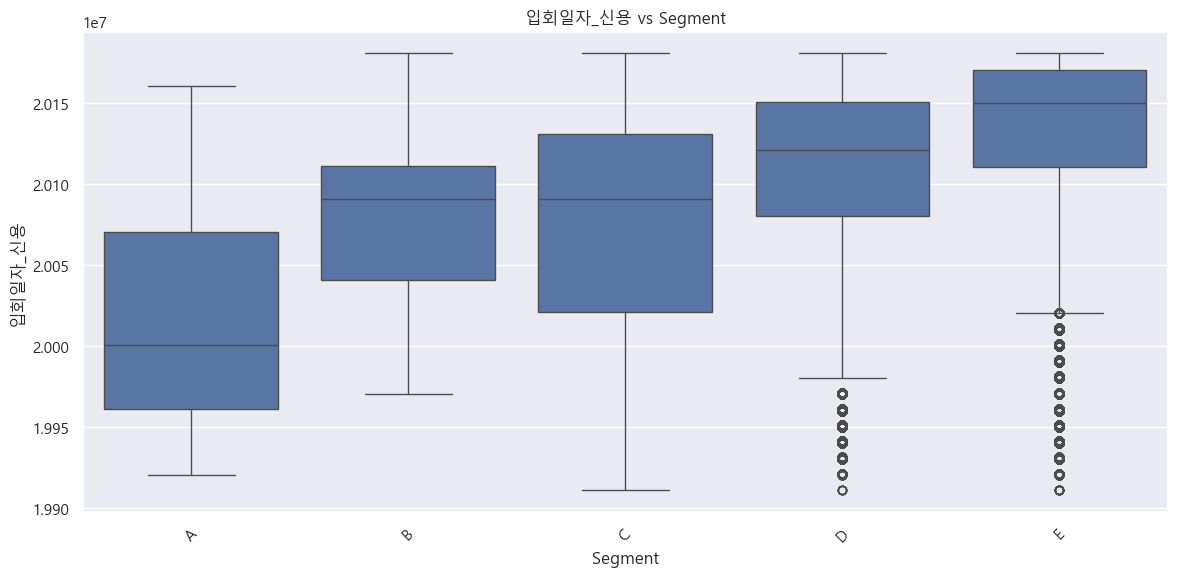

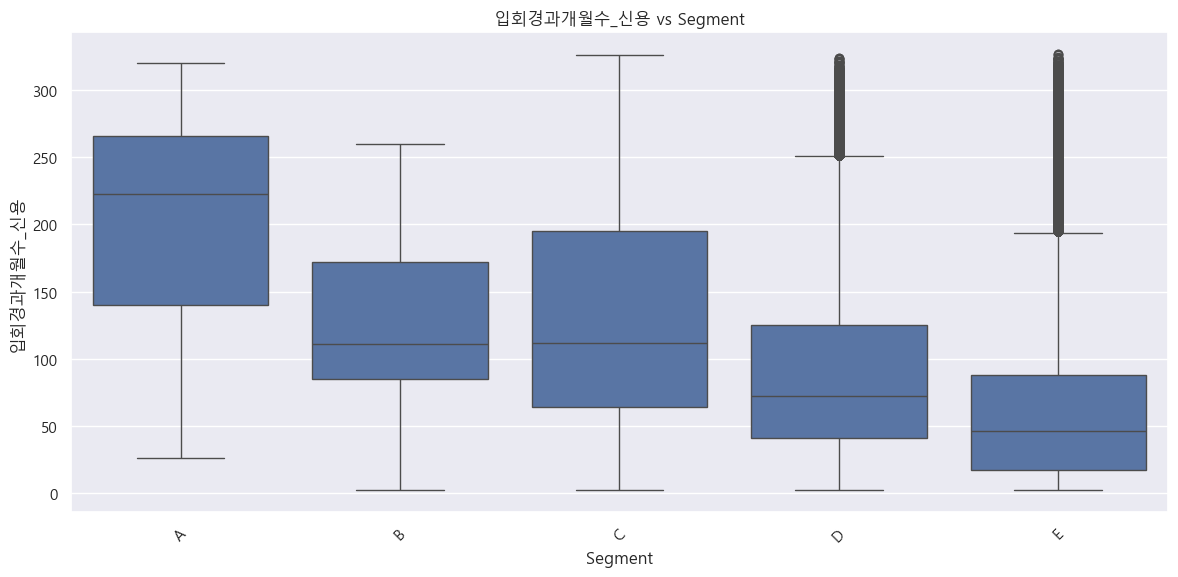

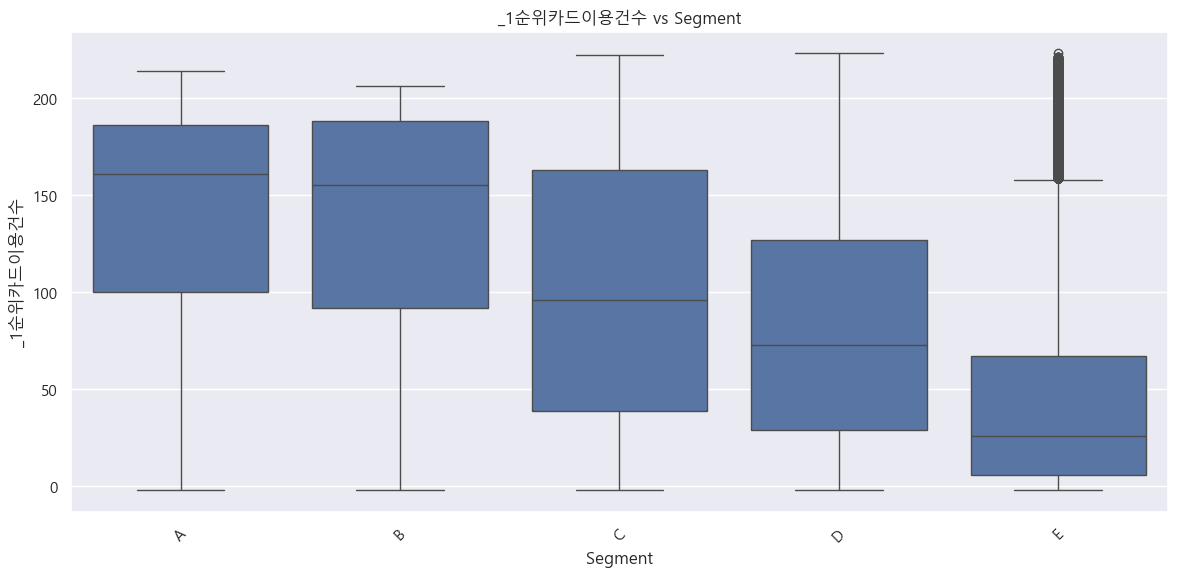

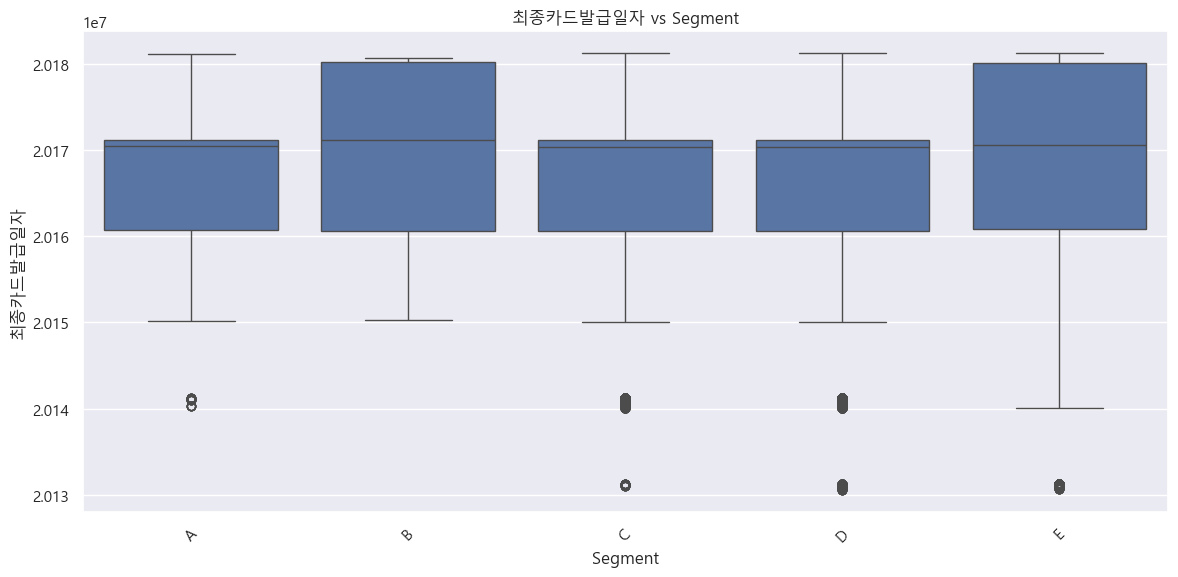

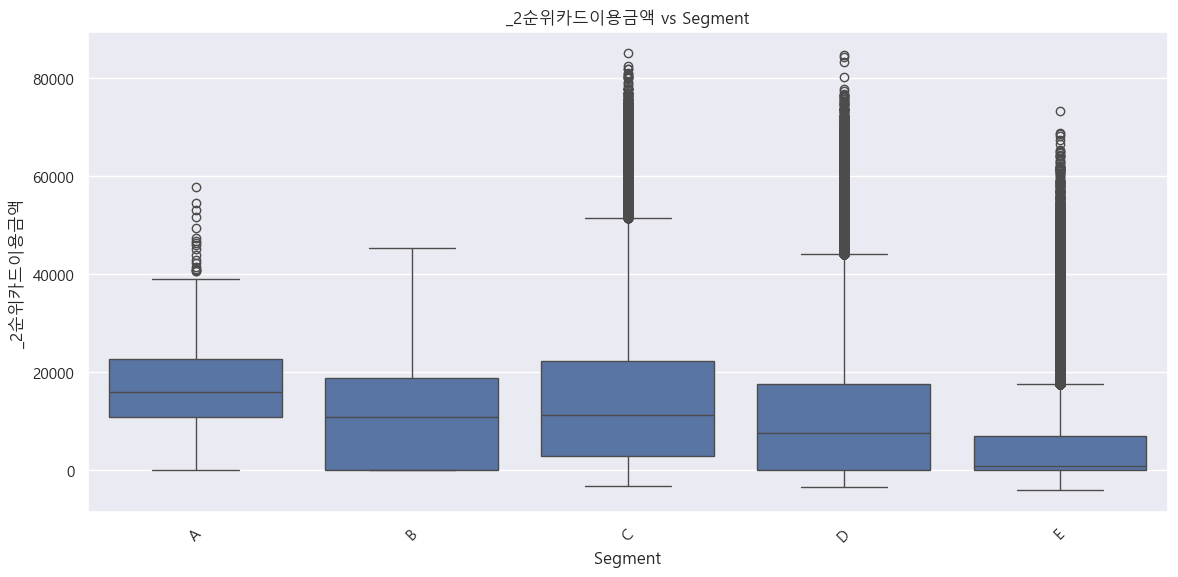

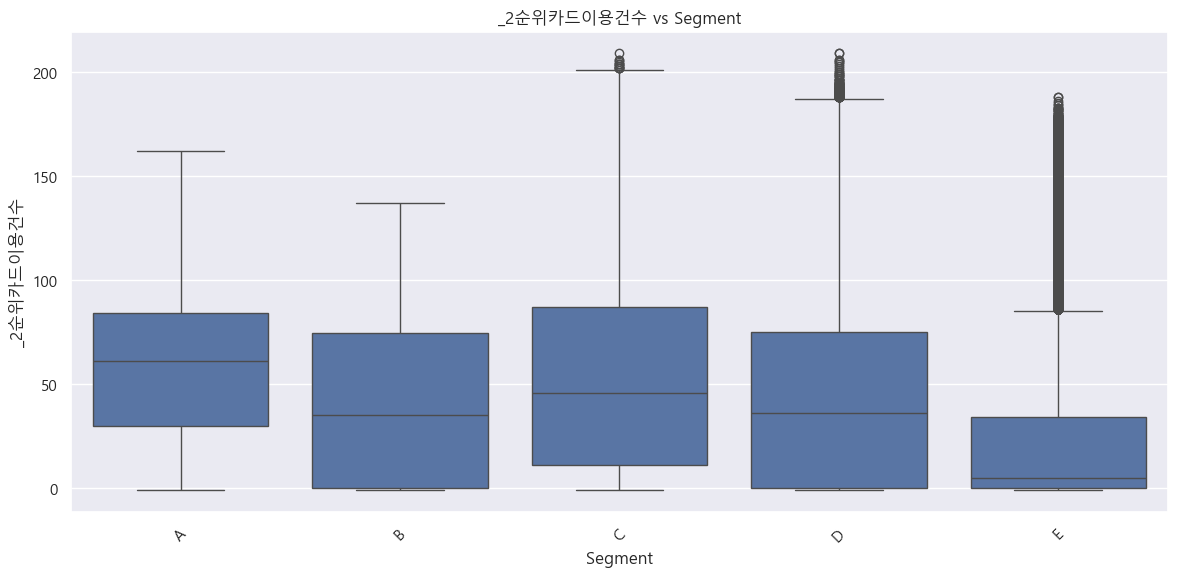

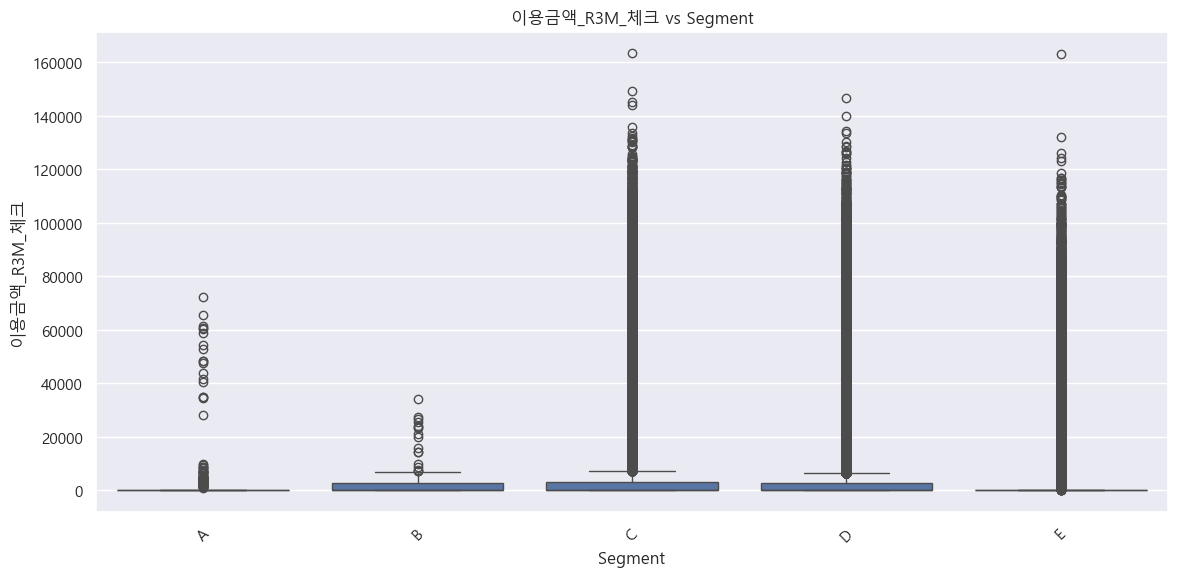

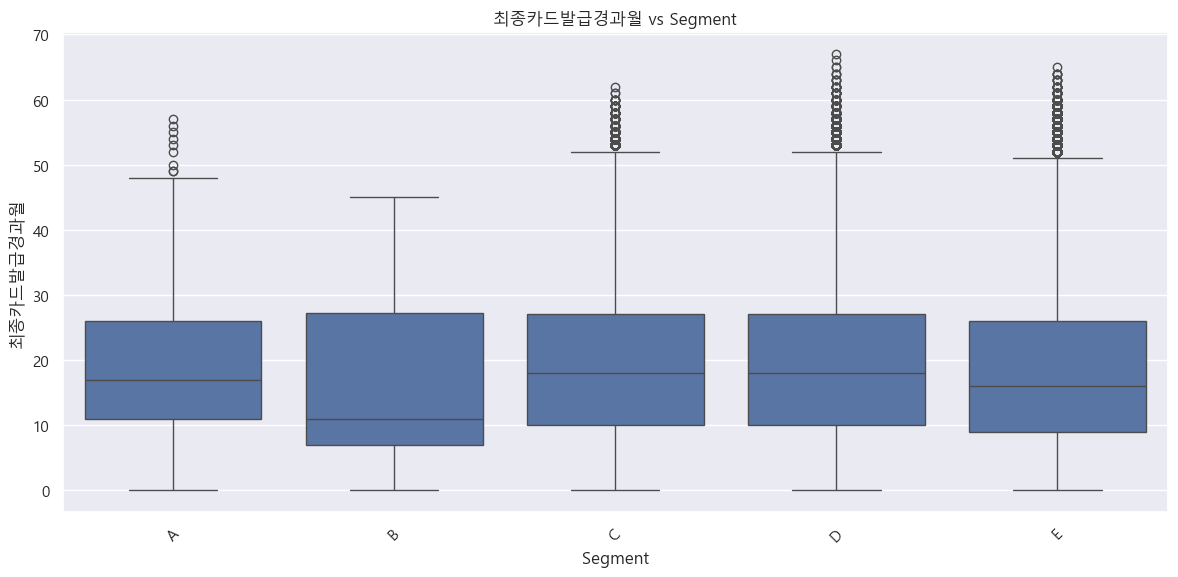

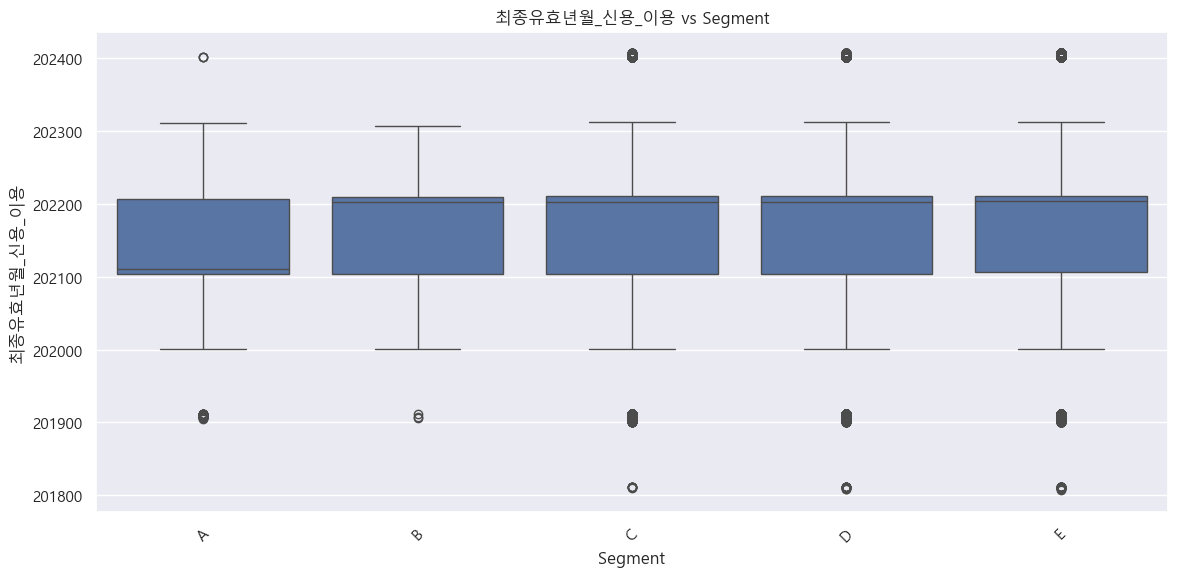

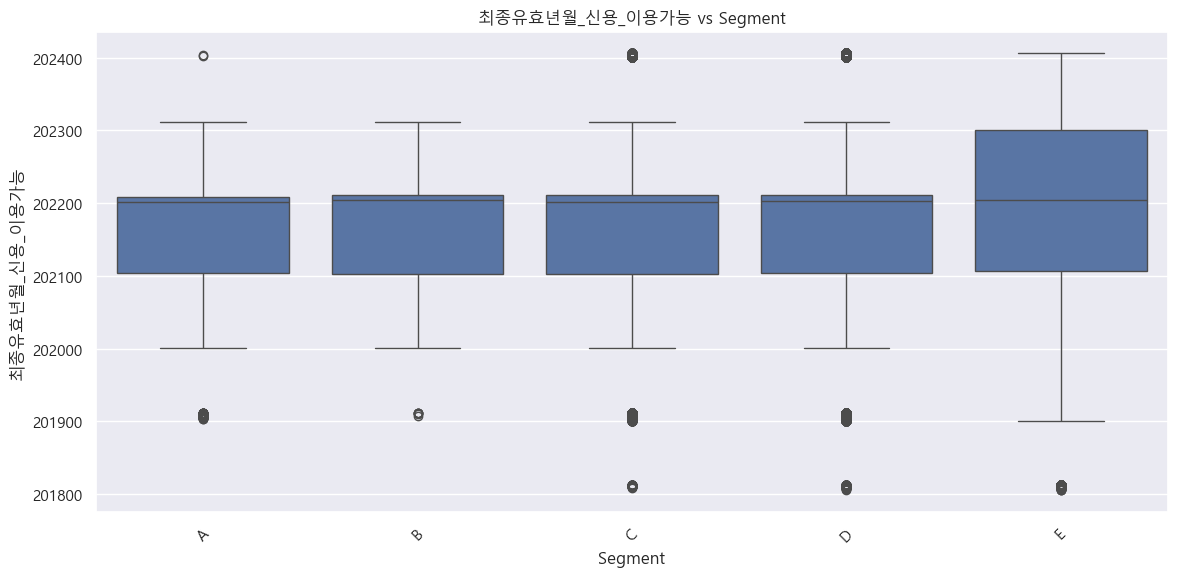

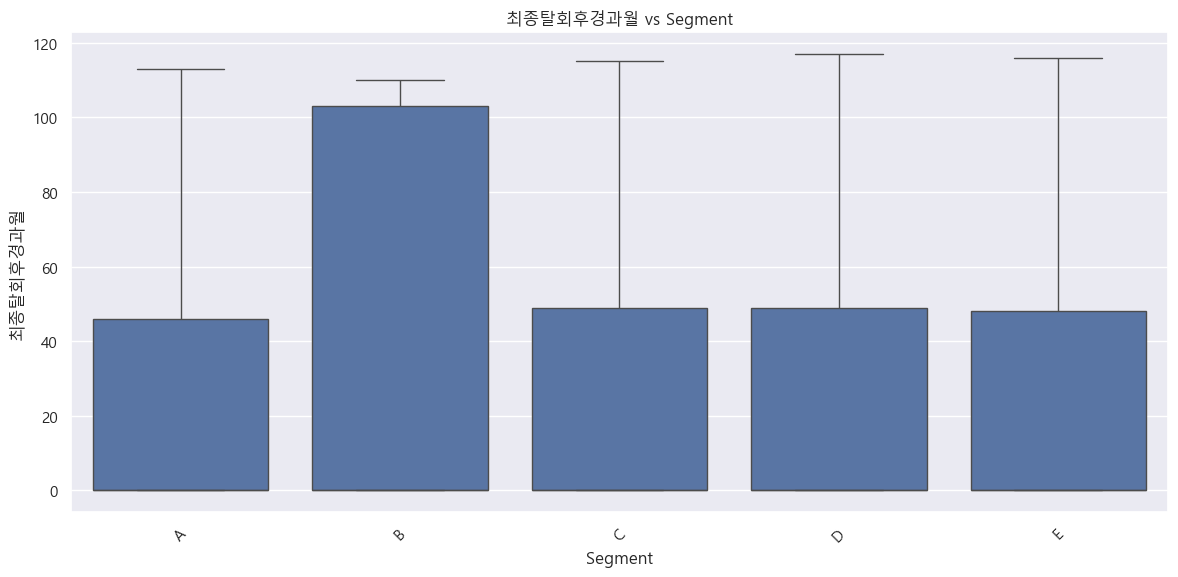

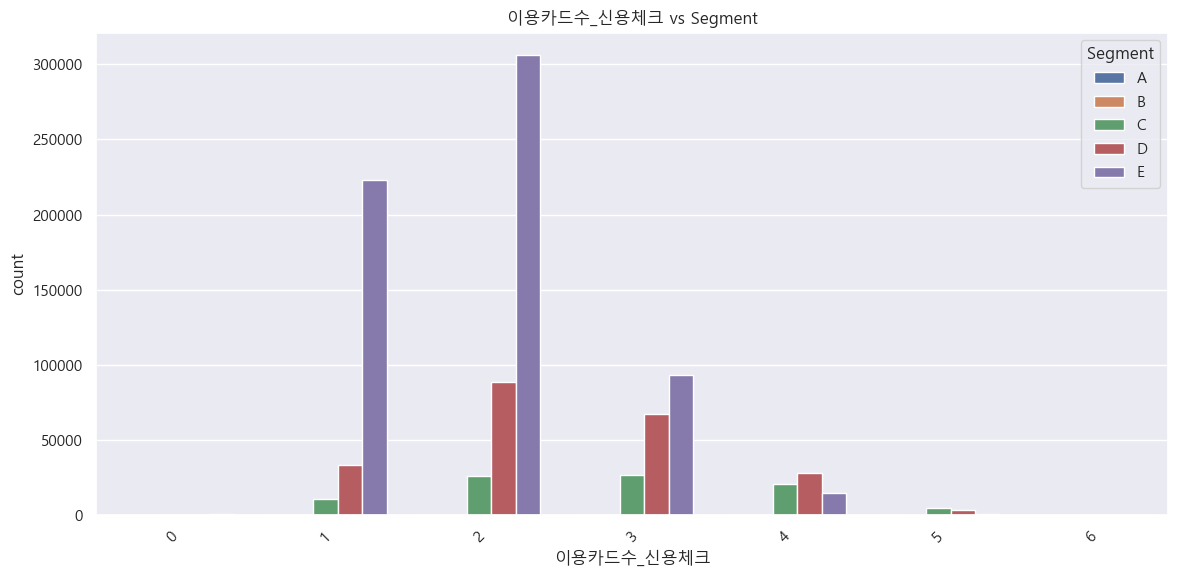

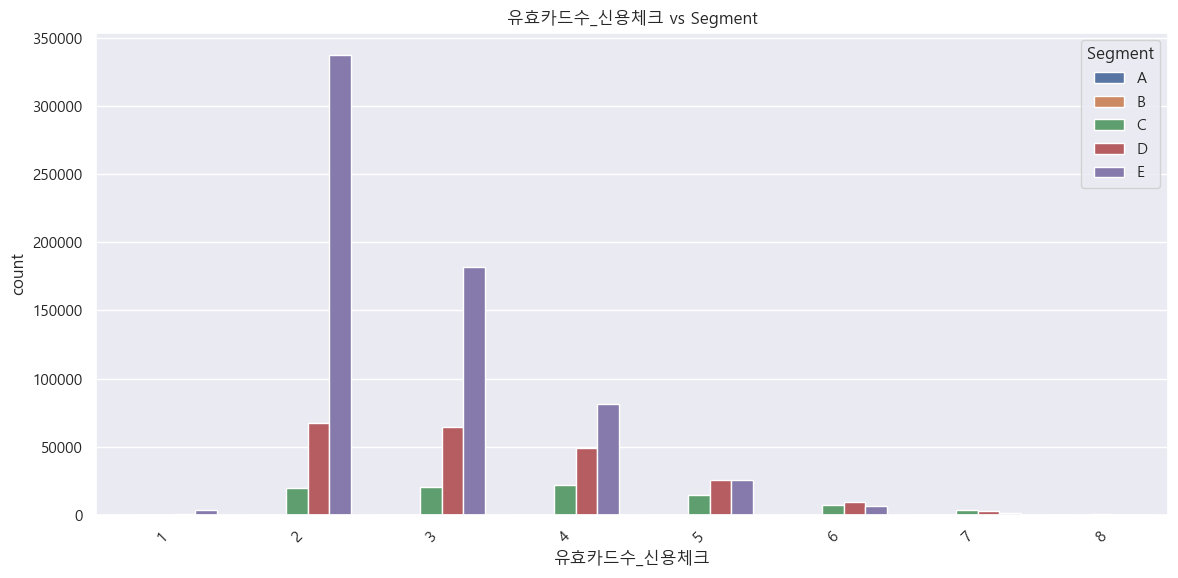

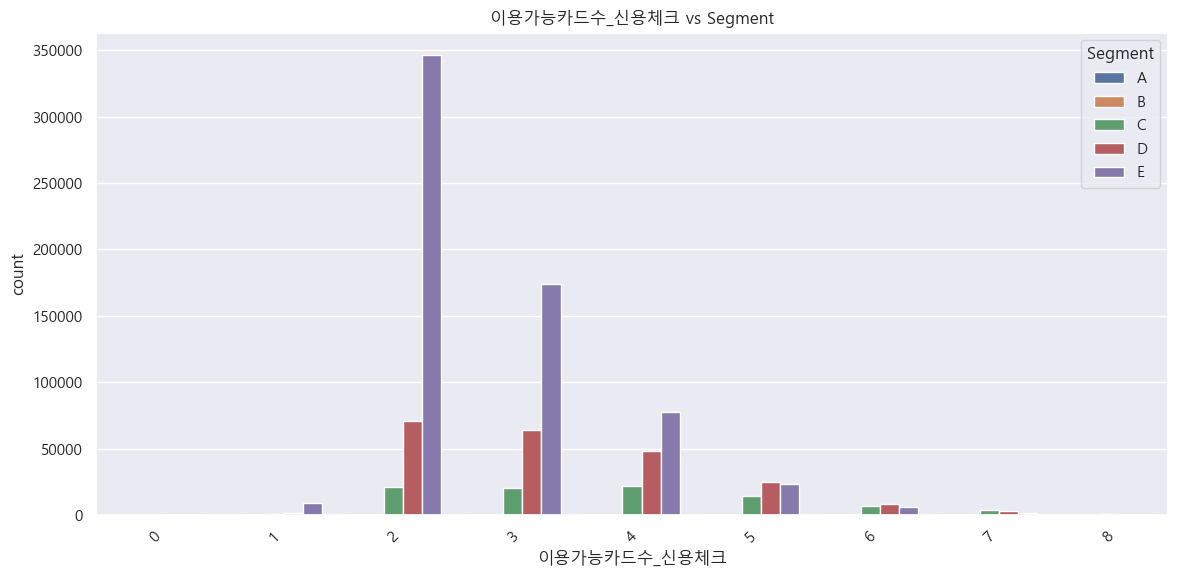

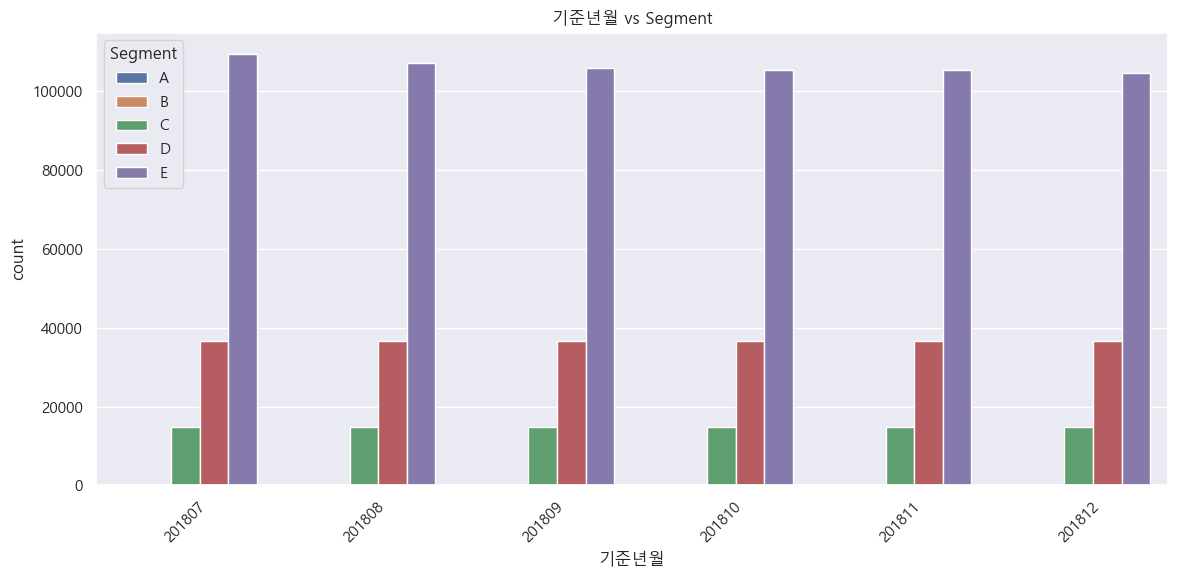

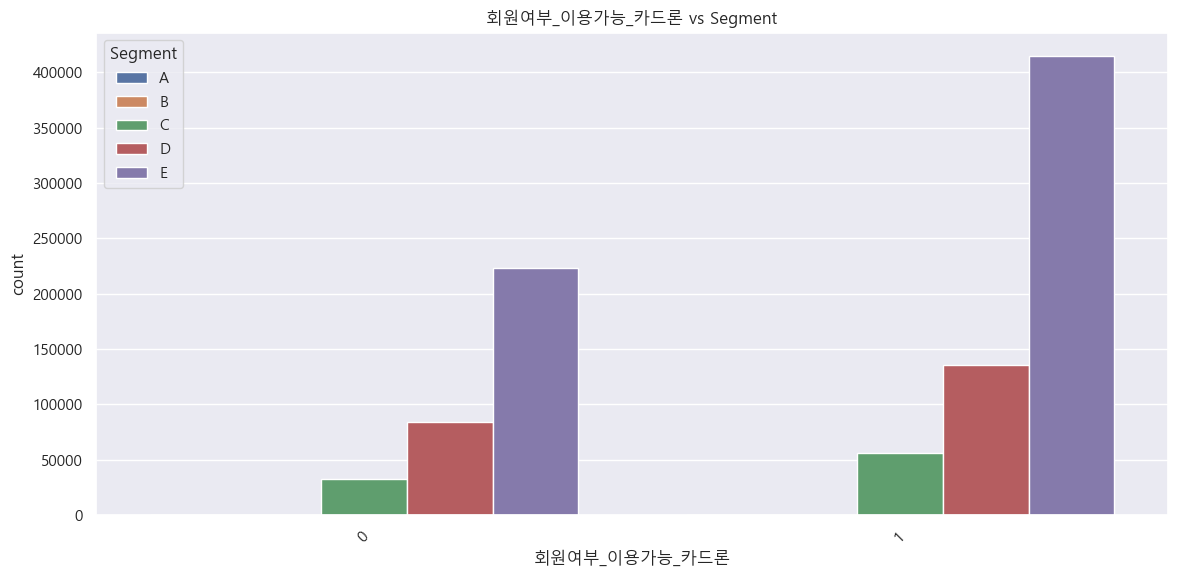

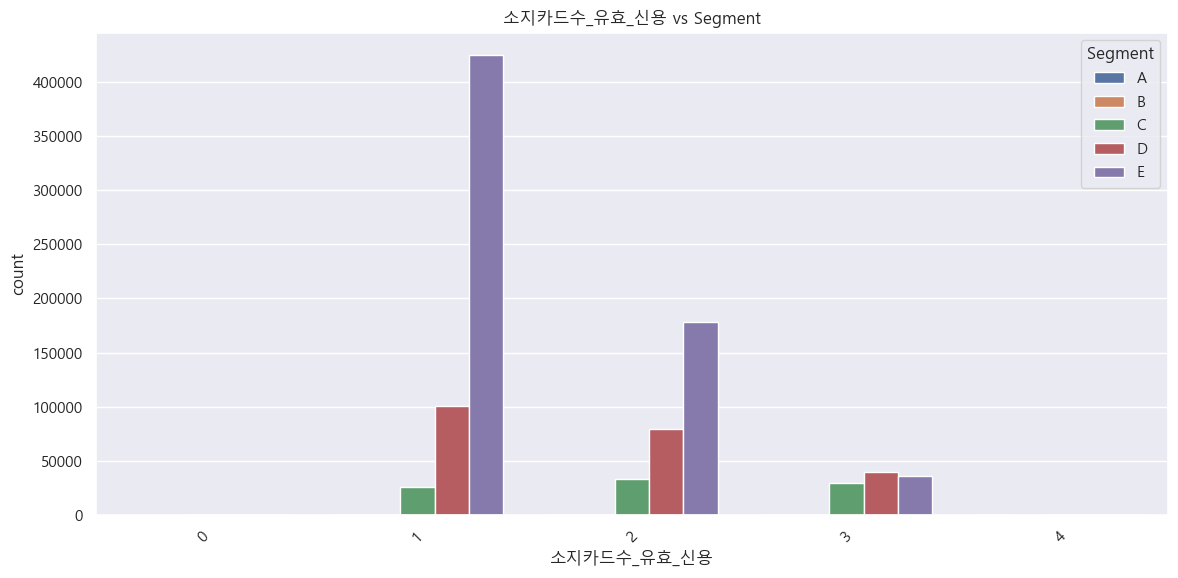

In [123]:
top_cols = importances.nlargest(20).index.tolist()

for col in top_cols:
    if df_all[col].nunique() < 15:
        sns.countplot(data=df_all, x=col, hue='Segment')
    else:
        sns.boxplot(data=df_all, x='Segment', y=col)
    plt.title(f"{col} vs Segment")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

###  📊 피쳐 정리 요약
- 입회 관련 변수 중요도 높음 → 유지

- 연체 여부는 큰 차이 없음 → 제거 가능

- 범주형 변수 전반 영향 약함 → 대부분 제거

- 상관관계 높은 피처는 하나만 유지

- 중요도 기반 Top 20 피처 우선 반영

In [131]:
# 중요 피처 상위 20개
top_cols = [
    '이용금액_R3M_신용체크', '_1순위카드이용금액', '이용금액_R3M_신용',
    '입회일자_신용', '입회경과개월수_신용', '_1순위카드이용건수',
    '최종카드발급일자', '_2순위카드이용금액', '_2순위카드이용건수',
    '이용금액_R3M_체크', '최종카드발급경과월', '최종유효년월_신용_이용',
    '최종유효년월_신용_이용가능', '최종탈회후경과월', '이용카드수_신용체크',
    '유효카드수_신용체크', '이용가능카드수_신용체크', '기준년월',
    '회원여부_이용가능_카드론', '소지카드수_유효_신용'
]

# 불필요하다고 판단된 변수
drop_cols = [
    '회원여부_연체',  # 연체는 유의미한 차이 없음
    '수신거부여부_TM', '수신거부여부_SMS',  # Segment 분포 차이 미미
    '남녀구분코드', '가입통신회사코드', '거주시도명', '직장시도명',  # 영향 미미
    '마케팅동의여부',  # 영향 미미
    'ID'  # 고유값, 예측에 불필요
    '_1순위카드이용금액' # 이용금액_R3M_신용과 비슷한 양상
]

# 최종 선택된 피처 목록 (Segment 포함)
selected_cols = top_cols + ['Segment']

# 선택된 컬럼만 필터링
df_selected = df_all[selected_cols]

# 필요 없는 피처 제거
df_selected = df_selected.drop(columns=[col for col in drop_cols if col in df_selected.columns])

# 결과 확인
print("최종 선택된 컬럼 수:", len(df_selected.columns))
print("컬럼 목록:", df_selected.columns.tolist())


최종 선택된 컬럼 수: 21
컬럼 목록: ['이용금액_R3M_신용체크', '_1순위카드이용금액', '이용금액_R3M_신용', '입회일자_신용', '입회경과개월수_신용', '_1순위카드이용건수', '최종카드발급일자', '_2순위카드이용금액', '_2순위카드이용건수', '이용금액_R3M_체크', '최종카드발급경과월', '최종유효년월_신용_이용', '최종유효년월_신용_이용가능', '최종탈회후경과월', '이용카드수_신용체크', '유효카드수_신용체크', '이용가능카드수_신용체크', '기준년월', '회원여부_이용가능_카드론', '소지카드수_유효_신용', 'Segment']
